<a id='top'></a>


CSCI E-82 - Advanced Machine Learning, Data Mining and Artificial Intelligence
=====

# Section 12:  Saturday 1st December 10 AM EST

*Dave Dowey*

### [Outlier Detection](#outlier_detection)
- Isolation Forest
- Local Outlier Factor


### [Network Analysis](#network_analysis)
- Intro, Random Graph, Centrality
- Pokemon example
- Flight connection example


### [Shakespeare](#shakespeare)
- Scraping with Beautiful Soup
- Network Analysis


------

In [67]:
import networkx as nx #pip install networkx
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #If you don't have seaborn, use - conda install seaborn

from itertools import combinations
from bs4 import BeautifulSoup #pip install beautifulsoup4
import requests
import re
import collections
from collections import Counter

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

%matplotlib inline

In [68]:
# special matplotlib command for global plot configuration
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.style

from matplotlib.colors import ListedColormap

dark2_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']
dark2_cmap = ListedColormap(dark2_colors)

def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 100
    rcParams['axes.prop_cycle'].by_key()['color'][1]
    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 12
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()

import seaborn as sns 
current_palette = sns.color_palette("Set2")

mpl.style.use('seaborn')   

<a id='outlier_detection'></a>


-----



[back to top](#top)

Outlier Detection 
=====


----------

### Isolation Forest


Proposed by Zhou et. al. in 2015, the isolation forest is a novel approach to anomaly detection that takes advantage of the following properties of anomalies:

(i) Most points in the data set are not anomalous.

(ii) Anomalies are typically very different from the rest of the dataset.

The model involves building a forest of binary classification trees, similar to the random forests algorithm except instead of classifying the data points, an isolation tree recursively partitions the dataset to isolate a given instance. Due to the aforementioned properties, it takes fewer partitions to separate anomalous data points from the rest of the dataset compared to a non-anomalous points. The following figure, extracted from their paper, illustrates this feature perfectly:


<img src = 'isolationforest.png' />


As a result, the path taken through an isolation tree to reach an anomalous point is much shorter than that of a normal point. When the trees within the isolation forest collectively produce shorter [than normal] path lengths for a particular point, the model can say (with some confidence) that the point is anomalous. It assigns anomaly score to each point.



- In scikit learn, decision_function from Isolation Forest Classifier can be used to get anomaly score. The lower the score, more anomalous the sample.

- Based on the anomaly score you can decide weather the given sample is anomalous or not by setting proper value of *contamination* in sklearn_IF object. default value of contamination is 0.1 which you can tune for deciding threshold. The amount of contamination of the data set, i.e. the proportion of outliers in the data set.


https://medium.com/towards-data-science/detecting-bot-matches-in-dota-2-using-isolation-forests-a17c34f60923
https://stackoverflow.com/questions/43063031/how-to-use-isolation-forest


Paper: https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

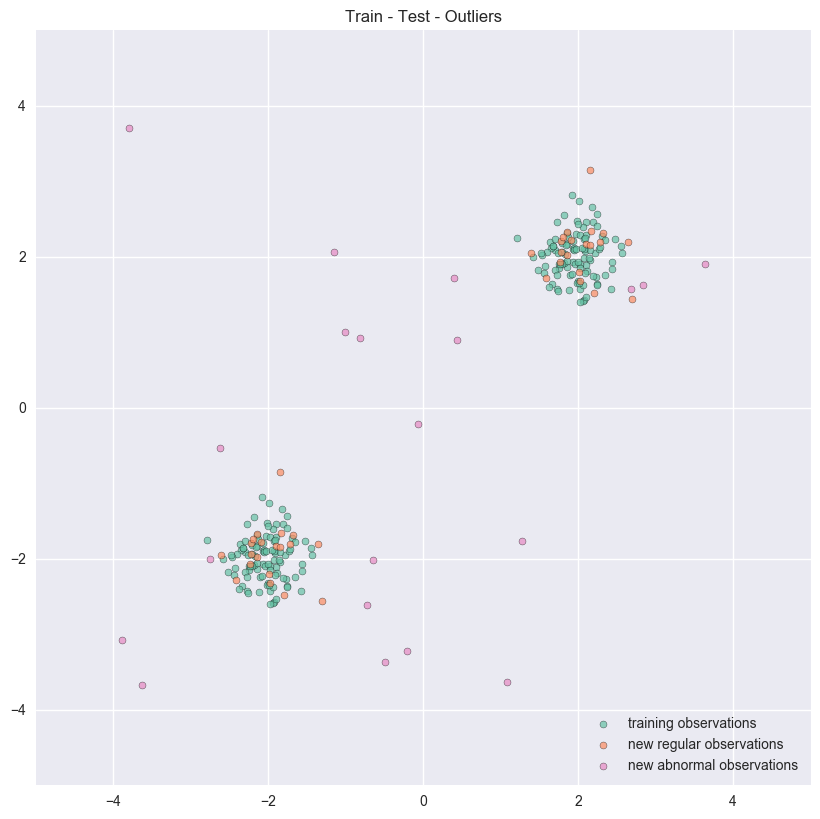

In [3]:
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]  #(200,2)

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2] #(40,2)

# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))  #(20,2) 

plt.figure(figsize=(10,10))
plt.title("Train - Test - Outliers")
b1 = plt.scatter(X_train[:, 0], X_train[:, 1],  color=current_palette[0], alpha=0.7, s=25, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], color=current_palette[1], alpha=0.7, s=25, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1],   color=current_palette[3], alpha=0.7, s=25, edgecolor='k')
#d = plt.scatter(X_outliers[ind, 0], X_outliers[ind, 1], color=current_palette[5], alpha=0.7, s=45, edgecolor='k')


plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.legend([b1, b2, c ],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="lower right")
plt.show()

In [4]:
# fit the model
clf = IsolationForest(max_samples=100, random_state=rng, contamination=0.001) 
#max_samples = The number of samples to draw from X to train each base estimator.
#contamination = The amount of contamination of the data set, i.e. the proportion
#of outliers in the data set.

clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
ind = np.argwhere(y_pred_outliers==-1)
print(y_pred_outliers)

[-1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1]


/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.

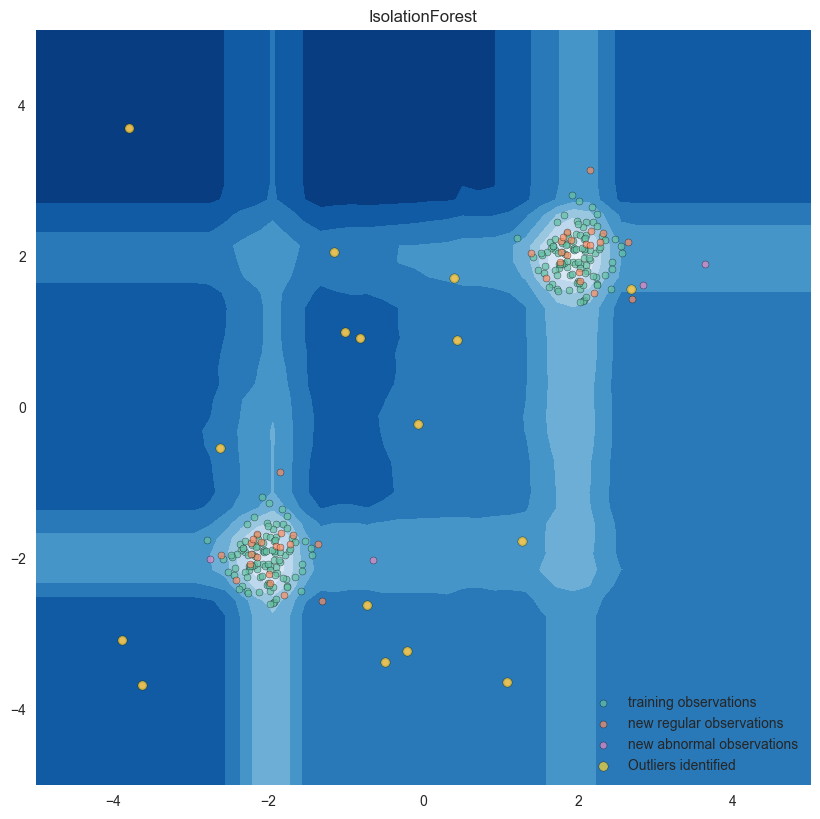

In [5]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1],  color=current_palette[0], alpha=0.7, s=25, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], color=current_palette[1], alpha=0.7, s=25, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1],   color=current_palette[3], alpha=0.7, s=25, edgecolor='k')
d = plt.scatter(X_outliers[ind, 0], X_outliers[ind, 1], color=current_palette[5], alpha=0.7, s=45, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

plt.legend([b1, b2, c, d ],
           ["training observations",
            "new regular observations", "new abnormal observations", 'Outliers identified'],
           loc="lower right")
plt.show()

## Local Outlier Factor

Paper- http://www.dbs.ifi.lmu.de/Publikationen/Papers/LOF.pdf

Data Mining Concepts and Techniques - Han, Kamber, Pei (Chapter 12)

http://scikit-learn.org/stable/auto_examples/neighbors/plot_lof.html

- Find anomalous data points by measuring the local deviation of a given data point with respect to its neighbours.

- Shares concept with DBSCAN

- There is a critical difference between the density measure here for outlier detection and that in density based clustering. In density based clustering, to determine whether an object can be considered a core object in a density based cluster, we use two parameters a radius parameter, r, to specify range of the neighborhood, and the minimum number of points in the r-neigborhood. Both parameters are global and are applied to every object. In contrast, as motivated by the observation that relative density is the key to finding local outliers, we use the parameter $k$ to quantify the neighborhood and do need to specify the minimum number of objects in the neighborhood as a requirement of density. [Han, Jiawei, et al. “12.” Data Mining: Concepts and Techniques, Elsevier/Morgan Kaufmann, 2012.]

---
- Remove outliers first and then cluster.

- Clustering methods may be sensitive to outliers. 

https://stats.stackexchange.com/questions/104373/identifying-subsets-for-outlier-detection-in-local-outlier-factor


/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


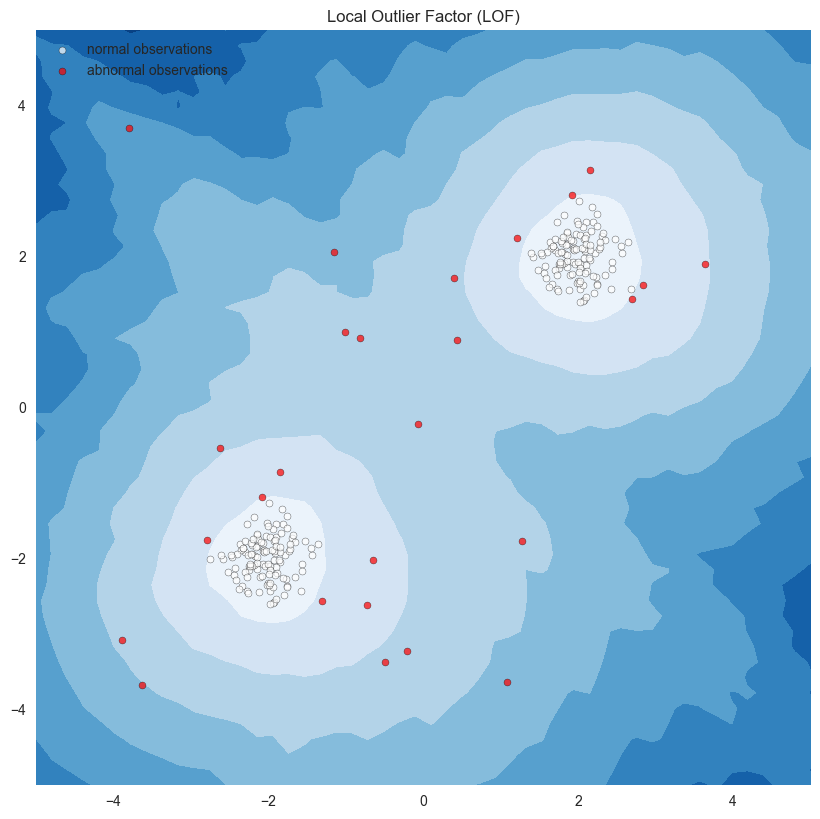

In [6]:
X = np.r_[X_train, X_test]
X = np.r_[X, X_outliers]

# fit the model
clf = LocalOutlierFactor(n_neighbors=20) #Number of neighbors to use by default = 20
y_pred = clf.fit_predict(X)
#print(y_pred)
y_pred_outliers = y_pred[200:]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[y_pred>0, 0], X[y_pred>0, 1], c='white', alpha=0.7, s=25, edgecolor='k')
b = plt.scatter(X[y_pred<0, 0], X[y_pred<0, 1], c='red', alpha=0.7, s=25, edgecolor='k')


plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

<a id='network_analysis'></a>

--------

[back to top](#top)


Network Analysis
========

Recommended Coursera course that takes everything we have seen into more detail  - [Social Economic Networks](https://www.coursera.org/learn/social-economic-networks) - Matthew O. Jackson  (Free course)

----------

In [7]:
nx.__version__

'2.2'

/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


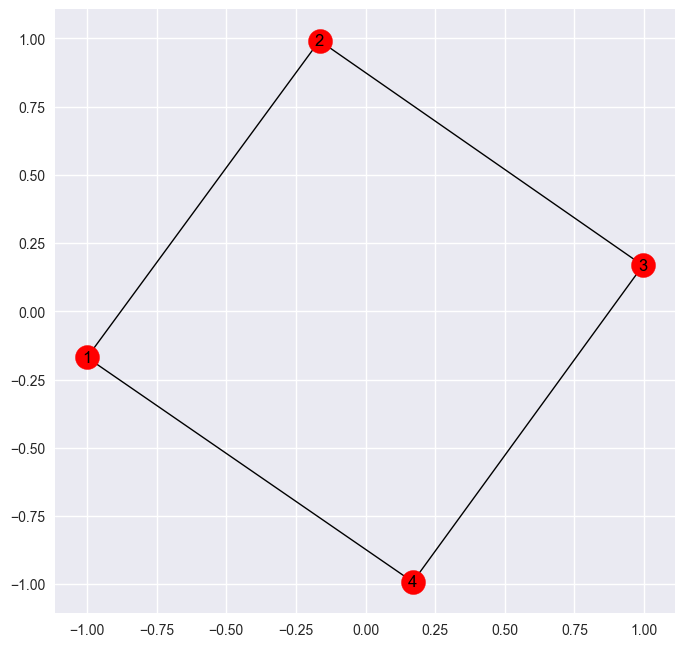

In [66]:
# Create empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3])
# add edges
G.add_edge(1, 2)
G.add_edges_from([(2,3),(3,4),(1,4)])

#display graph
plt.figure(figsize=(8,8))
nx.draw_networkx(G, with_labels=True)

In [9]:
G.nodes()

NodeView((1, 2, 3, 4))

In [10]:
# get graph info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [11]:
list(G.adjacency())

[(1, {2: {}, 4: {}}),
 (2, {1: {}, 3: {}}),
 (3, {2: {}, 4: {}}),
 (4, {3: {}, 1: {}})]

In [12]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.]])

**What's a degree of a graph ?**
The degree of a node is the number of other nodes to which it is connected.

In [13]:
G.degree()

DegreeView({1: 2, 2: 2, 3: 2, 4: 2})

In [14]:
nx.adj_matrix(G)
print(nx.adj_matrix(G))

  (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1


For large graphs, this measure is impractical since the output dictionary has an item for every node. In such cases, a histogram of the nodes' degree is often used to approximate its distribution. In the following example, a random network with 10,000 nodes and a link probability of 1 percent is built. Then, the histogram of the node degree is extracted and shown as follows:

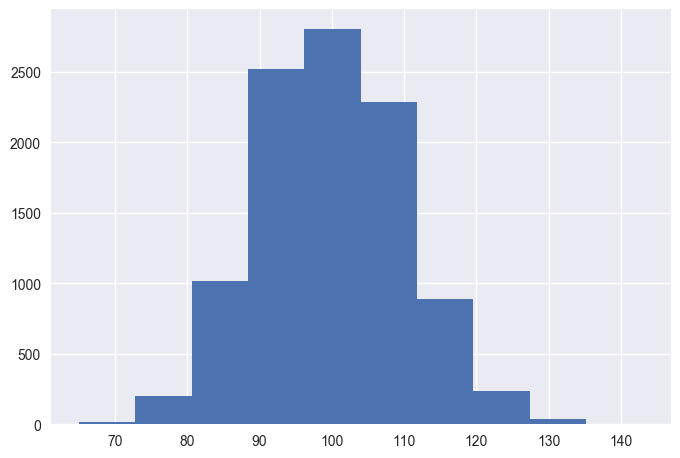

In [15]:
k = nx.fast_gnp_random_graph(n=10000, p=0.01).degree() #Erdős–Rényi Graph
plt.hist(list(dict(k).values()));

**Adding and Inspecting Attributes**

In [16]:
# add at creation
# nodes
G.add_node(5, favorite_color='blue')

G.add_nodes_from([(1, {'favorite_color' : 'blue'}),
                  (6, {'favorite_color' : 'red'}),
                  (7, {'favorite_color' :'purple'})])

# edges
G.add_edges_from([(1, 5, {'relationship': 'color'})]) 
G.add_edges_from([(5, 6, {'relationship': 'friends'})]) 

In [17]:
G.nodes.data()

NodeDataView({1: {'favorite_color': 'blue'}, 2: {}, 3: {}, 4: {}, 5: {'favorite_color': 'blue'}, 6: {'favorite_color': 'red'}, 7: {'favorite_color': 'purple'}})

In [18]:
# accessing node attributes
print("Node 5 attributes:", G.node[5])

# accessing edge attributes
print("Edge 1-5 attributes:", G.edges[1,5])
print("Edge 5-6 attributes:", G.edges[5,6])

Node 5 attributes: {'favorite_color': 'blue'}
Edge 1-5 attributes: {'relationship': 'color'}
Edge 5-6 attributes: {'relationship': 'friends'}


**Adding Attributes for each existing node**

In [19]:
favorite_foods = {
    1 : 'pizza',
    2 : 'mac and cheese',
    3 : 'Veg sandwich',
    4 : 'pizza',
    5 : 'chocolate',
    6 : 'pizza',
    7 : 'bananas'
}

nx.set_node_attributes(G, favorite_foods,  'favorite_food')

print("Node 4's favorite food is %s" % G.node[4]['favorite_food'])
# See more here - https://networkx.github.io/documentation/stable/tutorial.html

Node 4's favorite food is pizza


### Centrality

In [20]:
nx.degree_centrality(G)

{1: 0.5,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.3333333333333333,
 5: 0.3333333333333333,
 6: 0.16666666666666666,
 7: 0.0}

/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


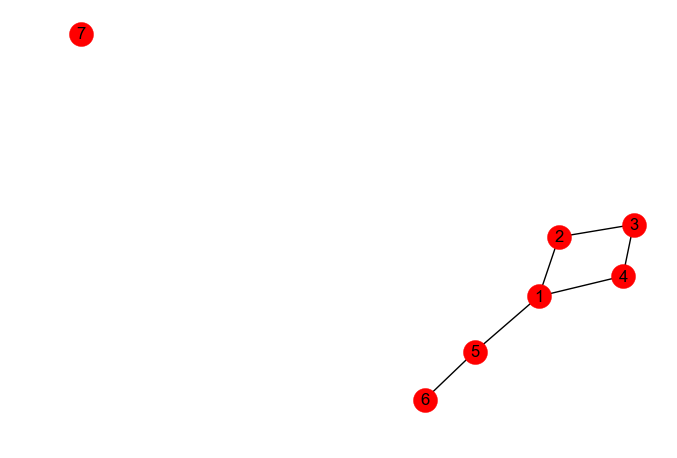

In [21]:
nx.draw_networkx(G)
plt.axis('off')
plt.show()

/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


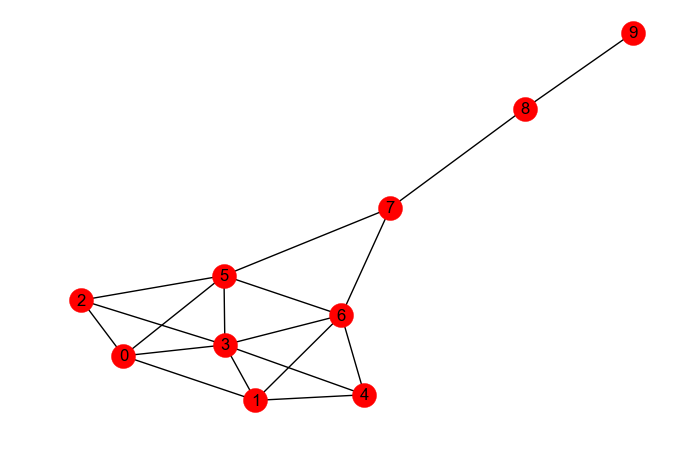

In [22]:
G = nx.krackhardt_kite_graph()  
nx.draw_networkx(G)
plt.axis('off')
plt.show()

https://en.wikipedia.org/wiki/Krackhardt_kite_graph

10 Vertices/Nodes

18 Edges

--- 

### Degree Centrality

The degree of a node is the number of other nodes to which it is connected.

How 'connected' is a node ? 

- Degree captures connectedness

- normalize by n-1 (most possible) (n is number of nodes)

- Degree represents how big/small is your local neighborhood. It doesn't say how you are positioned in a network/how central you are.

https://www.coursera.org/learn/social-economic-networks/lecture/ftmUf/2-3-centrality-measures
    

In [23]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

Comparing the above output and the graph, Node 3 has the highest degree centrality since it's the node with the maximum number of links (it's connected to six other nodes). On the contrary, node 9 is the node with the lowest degree since it has only one edge.

*Python Data Science Essentials - Second Edition - Alberto Boschetti; Luca Massaron*

--- 

### Closeness Centrality

$$ \frac{n-1}{\sum_{j}{lsp(i,j)}} $$


where  $lsp(i,j)$ si the  length of the shortest path between $i$ and $j$. 


Closeness is a measure of the degree to which an individual is near all other individuals in a network.  It is the inverse of the sum of the shortest distances between each node and every other node in the network. (n-1 term is for normalizing)

- Ease of reaching other nodes, How close one node is to another ? How far am I from other nodes? 

- scales directly with distance, twice as far is half as central.

It results in a score between 0 (the greater average distance) and 1 (the lower average distance).    

In our example, for node 9, the shortest path distances are `[1, 2, 3, 3, 4, 4, 4, 4, 4]`.  


So closeness centrality = `(10-1)/np.sum([1, 2, 3, 3, 4, 4, 4, 4, 4])`


In [24]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

Comparing the above output and the graph, the nodes with high closeness centrality are 5, 6, and 3. In fact, they are the nodes that are present in the middle of the network, and on an average, they can reach all the other nodes with a few hops. The lowest score belongs to node 9. Its average distance to reach all the other nodes is pretty high.

**Betweenness Centrality**

- A measure of centrality in a graph based on shortest paths.

- Nodes with high betweenness centrality are the core components of the network, and many shortest paths route through them.

<img width="256" alt="Graph betweenness" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/60/Graph_betweenness.svg/512px-Graph_betweenness.svg.png"/>

https://commons.wikimedia.org/wiki/File%3AGraph_betweenness.svg

By Claudio Rocchini (Own work) [GFDL (http://www.gnu.org/copyleft/fdl.html), CC-BY-SA-3.0 (http://creativecommons.org/licenses/by-sa/3.0/) or CC BY 2.5 (http://creativecommons.org/licenses/by/2.5)], via Wikimedia Commons from Wikimedia Commons


An undirected graph colored based on the betweenness centrality of each vertex from least (red) to greatest (blue).

In [25]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

The highest betweenness centrality is achieved by node 7. It seems very important since it's the only node that connects elements 8 and 9 (it's their gateway to the network). On the contrary, nodes such as 9, 2, and 4 are on the extreme border of the network, and they are not present in any of the shortest paths of the network. Therefore, these nodes can be removed without affecting the connectivity of the network.

---

** Eigenvector Centrality **

"Not what you know, who you know" 

In degree centrality, we consider nodes with more connections to be more important. However, in real-world scenarios, having more friends does not by itself guarantee that someone is important: having more important friends provides a stronger signal.

-- Compute the centrality of a node as a function of the centralities of its neighbors.

-- Google's Page Rank Algorithm


In [26]:
nx.eigenvector_centrality(G)

{0: 0.35220898139203594,
 1: 0.35220898139203594,
 2: 0.2858347353163241,
 3: 0.4810204881221006,
 4: 0.2858347353163241,
 5: 0.3976910106255469,
 6: 0.3976910106255469,
 7: 0.19586185175360382,
 8: 0.04807477501420294,
 9: 0.011164058575824238}

Nodes 3 and 9 respectively have the highest and the lowest scores according to the eigenvector centrality measure. 

### Pokemon Network Graph

In [27]:
url = 'https://raw.githubusercontent.com/ChihChengLiang/pokemongor/master/data-raw/pokemons.csv'
pokemons = pd.read_csv(url, usecols=['Identifier','Type1'])

In [28]:
pokemons.head()

Identifier  Type1
0   Bulbasaur  GRASS
1     Ivysaur  GRASS
2    Venusaur  GRASS
3  Charmander   FIRE
4  Charmeleon   FIRE

In [29]:
# Build your graph
g = nx.from_pandas_edgelist(pokemons, 'Identifier', 'Type1')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 165
Number of edges: 150
Average degree:   1.8182


In [30]:
list(g.edges.data())

[('Bulbasaur', 'GRASS', {}),
 ('GRASS', 'Ivysaur', {}),
 ('GRASS', 'Venusaur', {}),
 ('GRASS', 'Oddish', {}),
 ('GRASS', 'Gloom', {}),
 ('GRASS', 'Vileplume', {}),
 ('GRASS', 'Bellsprout', {}),
 ('GRASS', 'Weepinbell', {}),
 ('GRASS', 'Victreebel', {}),
 ('GRASS', 'Exeggcute', {}),
 ('GRASS', 'Exeggutor', {}),
 ('GRASS', 'Tangela', {}),
 ('Charmander', 'FIRE', {}),
 ('FIRE', 'Charmeleon', {}),
 ('FIRE', 'Charizard', {}),
 ('FIRE', 'Vulpix', {}),
 ('FIRE', 'Ninetales', {}),
 ('FIRE', 'Growlithe', {}),
 ('FIRE', 'Arcanine', {}),
 ('FIRE', 'Ponyta', {}),
 ('FIRE', 'Rapidash', {}),
 ('FIRE', 'Magmar', {}),
 ('FIRE', 'Flareon', {}),
 ('FIRE', 'Moltres', {}),
 ('Squirtle', 'WATER', {}),
 ('WATER', 'Wartortle', {}),
 ('WATER', 'Blastoise', {}),
 ('WATER', 'Psyduck', {}),
 ('WATER', 'Golduck', {}),
 ('WATER', 'Poliwag', {}),
 ('WATER', 'Poliwhirl', {}),
 ('WATER', 'Poliwrath', {}),
 ('WATER', 'Tentacool', {}),
 ('WATER', 'Tentacruel', {}),
 ('WATER', 'Slowpoke', {}),
 ('WATER', 'Slowbro', {}),

In [31]:
nx.write_graphml(g,'so.graphml')  # Can be used with Gephi

In [32]:
pd.unique(pokemons.Type1)

array(['GRASS', 'FIRE', 'WATER', 'BUG', 'NORMAL', 'POISON', 'ELECTRIC',
       'GROUND', 'FAIRY', 'FIGHTING', 'PSYCHIC', 'ROCK', 'GHOST', 'ICE',
       'DRAGON'], dtype=object)

Visualization from Gephi (https://gephi.org/)
<img src = 'pokemon_gephi.png'  width=800, height=800/>

/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


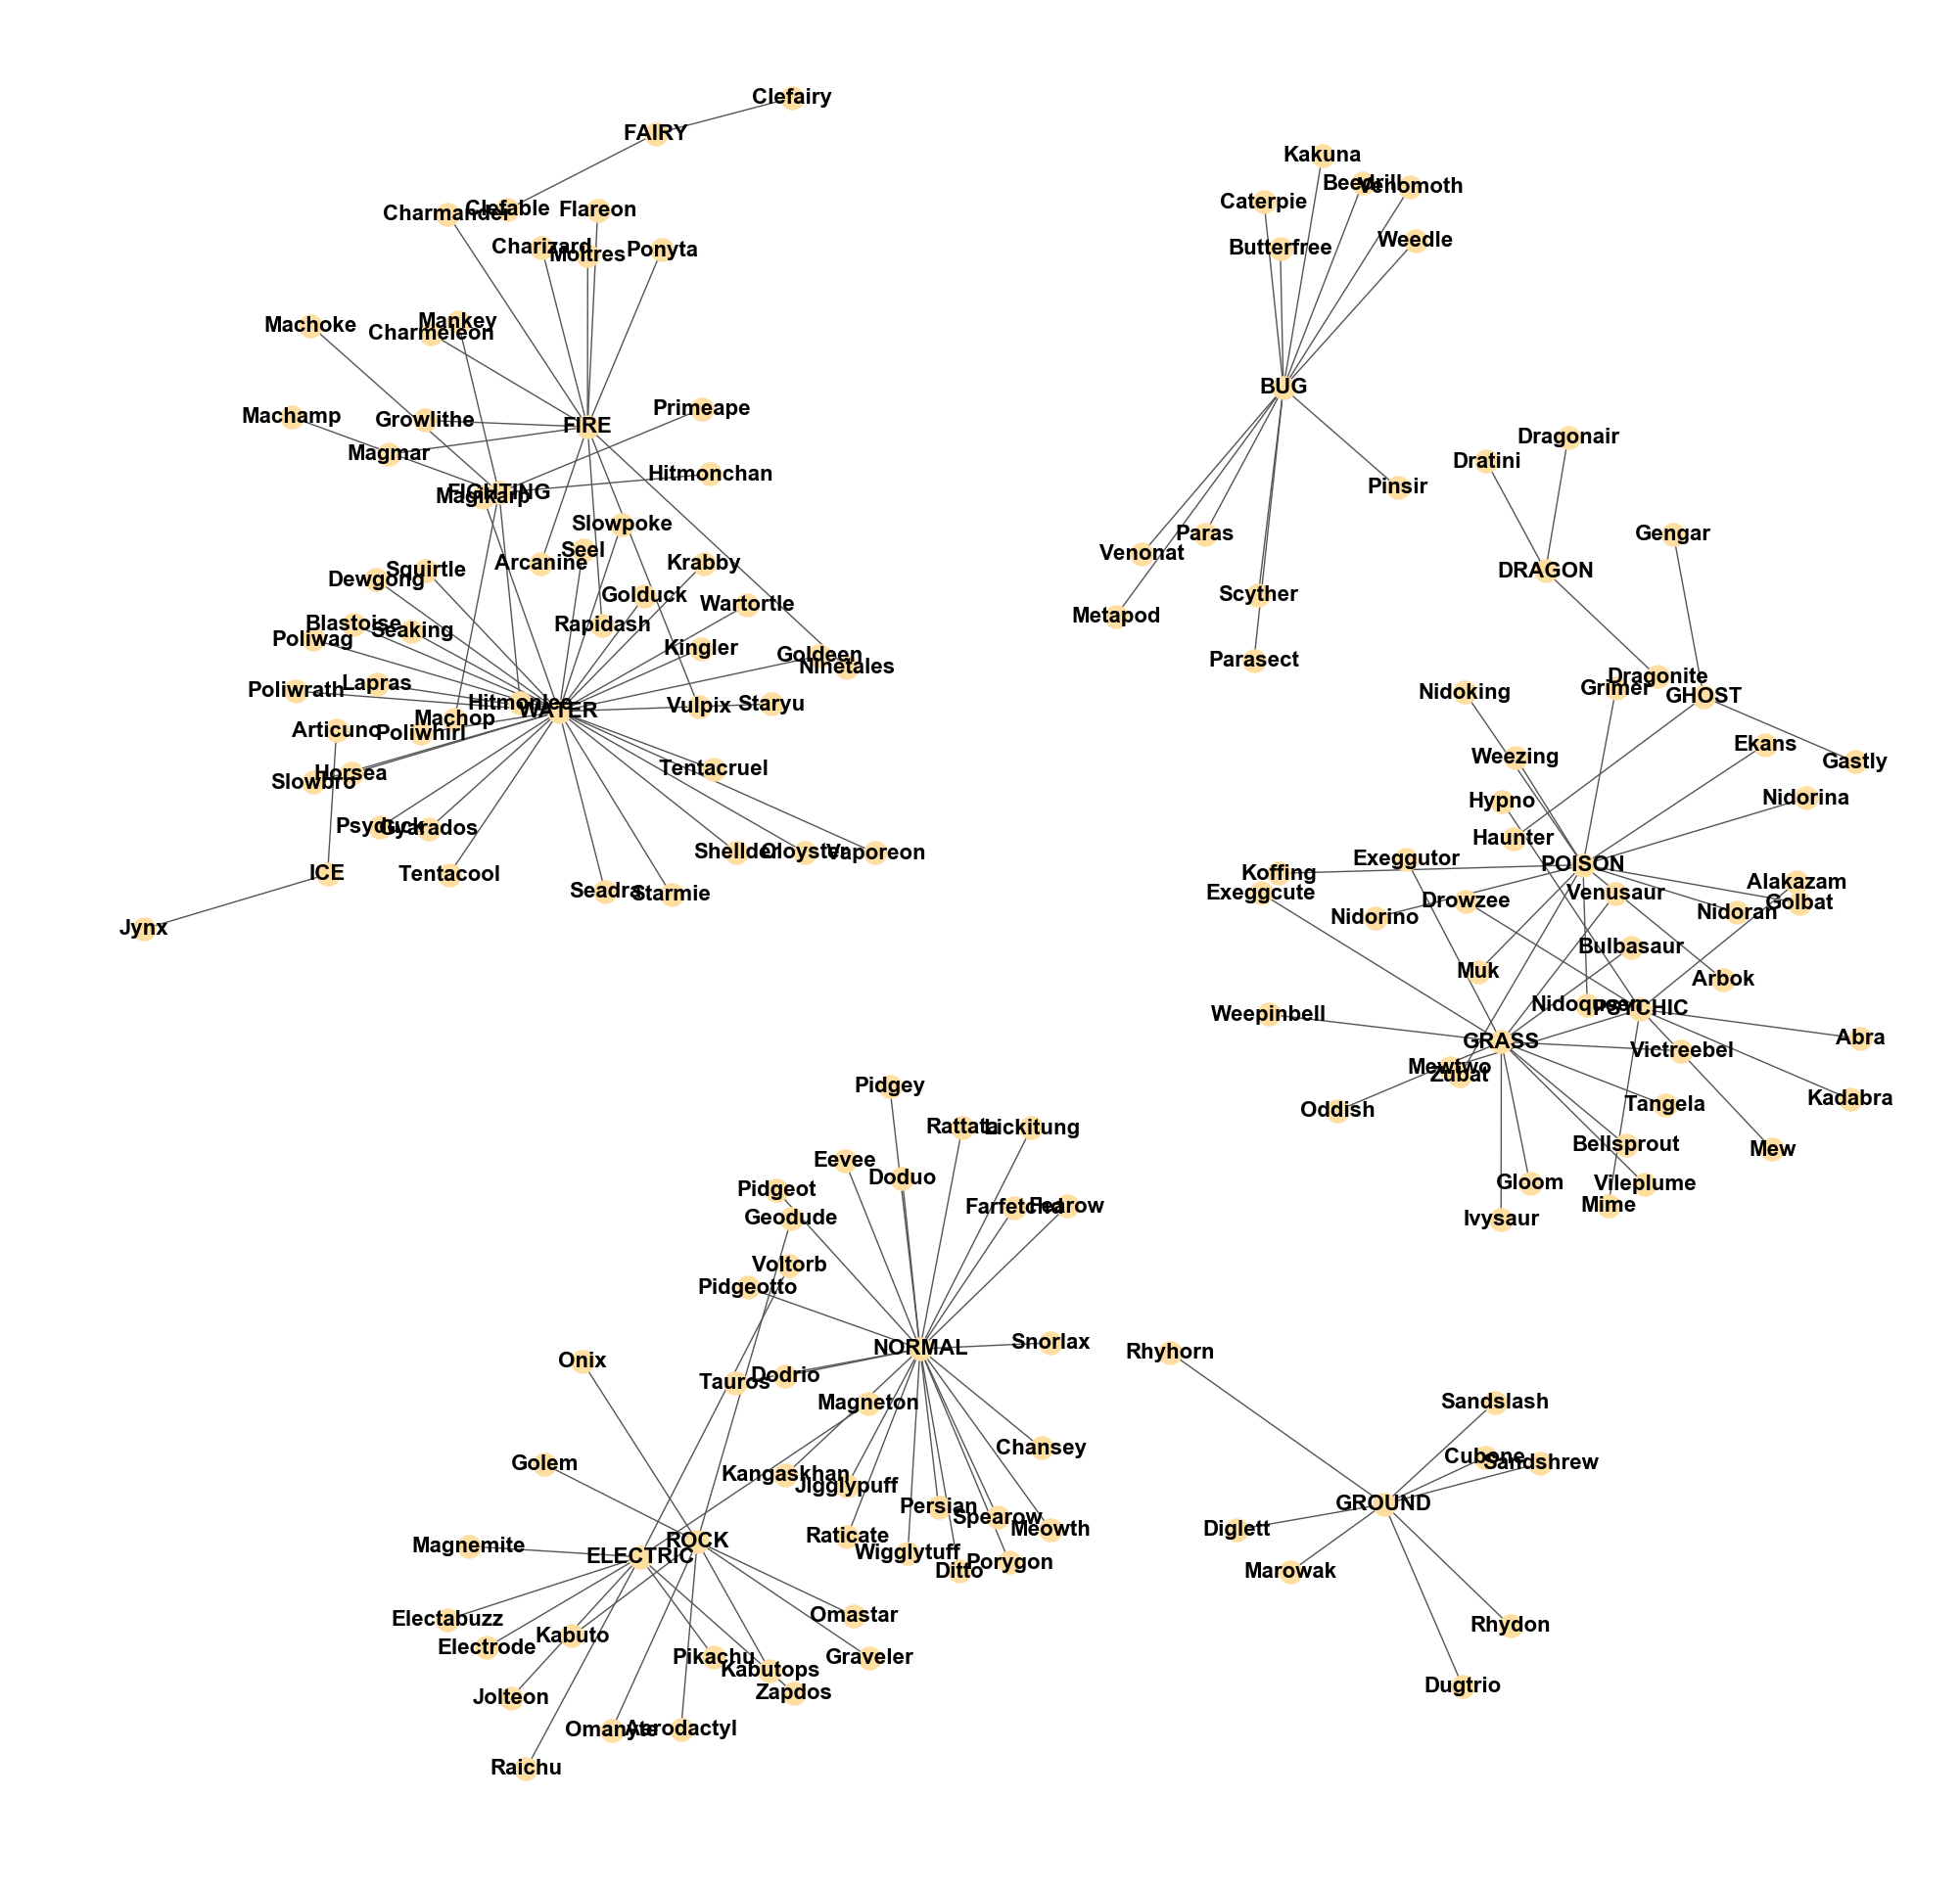

In [33]:
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#555555',
    'width': 1,
    'with_labels': True, 
    'node_color': '#FFDEA2',
    'font_weight': 'bold',
    'font_size':16
}

nx.draw_networkx(g,   pos=nx.spring_layout(g, k=0.22, iterations=50), **options)
#nx.draw_spring(g, **options)
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [34]:
dict1 = nx.degree_centrality(g)

for i,w in enumerate(sorted(dict1, key=dict1.get, reverse=True)):
    if (i < 15):
        print (w, dict1[w])
    else:
        break

WATER 0.17073170731707318
NORMAL 0.13414634146341464
POISON 0.07926829268292683
GRASS 0.07317073170731708
FIRE 0.07317073170731708
BUG 0.07317073170731708
ELECTRIC 0.054878048780487805
ROCK 0.054878048780487805
GROUND 0.04878048780487805
PSYCHIC 0.04878048780487805
FIGHTING 0.042682926829268296
GHOST 0.01829268292682927
DRAGON 0.01829268292682927
FAIRY 0.012195121951219513
ICE 0.012195121951219513


'WATER' has the highest degree centrality, looking at the graph, we note that most Pokemons are of type WATER (than any other).


------


## Example - US flight connections 


#### Source: 
This is one of the 100+ free recipes of the IPython Cookbook, Second Edition, by Cyrille Rossant, a guide to numerical computing and data science in the Jupyter Notebook. The ebook and printed book are available for purchase at Packt Publishing.

[Example code from here](https://ipython-books.github.io/142-drawing-flight-routes-with-networkx/)

Load the airline data which contains the flight routes into a Pandas dataframe

In [35]:
names = ('airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment').split(',')

url = 'https://github.com/ipython-books/cookbook-2nd-data/blob/master/routes.dat?raw=true'
routes = pd.read_csv(url, names=names, header=None)

routes.head()

airline airline_id source source_id dest dest_id codeshare  stops equipment
0      2B        410    AER      2965  KZN    2990       NaN      0       CR2
1      2B        410    ASF      2966  KZN    2990       NaN      0       CR2
2      2B        410    ASF      2966  MRV    2962       NaN      0       CR2
3      2B        410    CEK      2968  KZN    2990       NaN      0       CR2
4      2B        410    CEK      2968  OVB    4078       NaN      0       CR2

Next, load the airport data which has the idententiers of US airports into a Pandas dataframe

In [36]:
names = ('id,name,city,country,iata,icao,lat,lon,alt,timezone,dst,tz,type,source').split(',')

url  =     'https://github.com/ipython-books/cookbook-2nd-data/blob/master/airports.dat?raw=true'
airports = pd.read_csv(url, header=None, names=names, index_col=4, na_values='\\N')

# Keep only the US airports
airports = airports[airports['country'] == 'United States']
airports.head()


id                        name           city        country  icao  \
iata                                                                         
BTI   3411  Barter Island LRRS Airport  Barter Island  United States  PABA   
LUR   3413  Cape Lisburne LRRS Airport  Cape Lisburne  United States  PALU   
PIZ   3414      Point Lay LRRS Airport      Point Lay  United States  PPIZ   
ITO   3415  Hilo International Airport           Hilo  United States  PHTO   
ORL   3416   Orlando Executive Airport        Orlando  United States  KORL   

            lat         lon  alt  timezone dst                 tz     type  \
iata                                                                         
BTI   70.134003 -143.582001    2      -9.0   A  America/Anchorage  airport   
LUR   68.875099 -166.110001   16      -9.0   A  America/Anchorage  airport   
PIZ   69.732903 -163.005005   22      -9.0   A  America/Anchorage  airport   
ITO   19.721399 -155.048004   38     -10.0   N   Pacific/Honolulu  airport   
ORL   28.545500  -81.332901  113      -5.0   A   America/New_York  airport   

           source  
iata               
BTI   OurAirports  
LUR   OurAirports  
PIZ   OurAirports  
ITO   OurAirports  
ORL   OurAirports

Pare down the flights dataframe to keep only the US airport routes.

In [37]:
routes = routes[ routes['source'].isin(airports.index) & routes['dest'].isin(airports.index)]
routes.head()

airline airline_id source source_id dest dest_id codeshare  stops  \
172      2O        146    ADQ      3531  KLN    7162       NaN      0   
177      2O        146    KLN      7162  KYK    7161       NaN      0   
260      3E      10739    BRL      5726  ORD    3830       NaN      0   
261      3E      10739    BRL      5726  STL    3678       NaN      0   
262      3E      10739    DEC      4042  ORD    3830       NaN      0   

    equipment  
172       BNI  
177       BNI  
260       CNC  
261       CNC  
262       CNC

Create the edges for the network graph

In [38]:
edges = routes[['source', 'dest']].values
print(edges)

[['ADQ' 'KLN']
 ['KLN' 'KYK']
 ['BRL' 'ORD']
 ...
 ['SOW' 'PHX']
 ['VIS' 'LAX']
 ['WRL' 'CYS']]


And then from the edges array, create the network graph.

In [39]:
g = nx.from_edgelist(edges)

print ("Number of nodes: {} \nNumber of edges:  {}".format(g.number_of_nodes(),g.number_of_edges()))

Number of nodes: 546 
Number of edges:  2781


Alternatively we get the number of nodes and edges when we get the basic info for the routes graph.

In [40]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 546
Number of edges: 2781
Average degree:  10.1868


/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


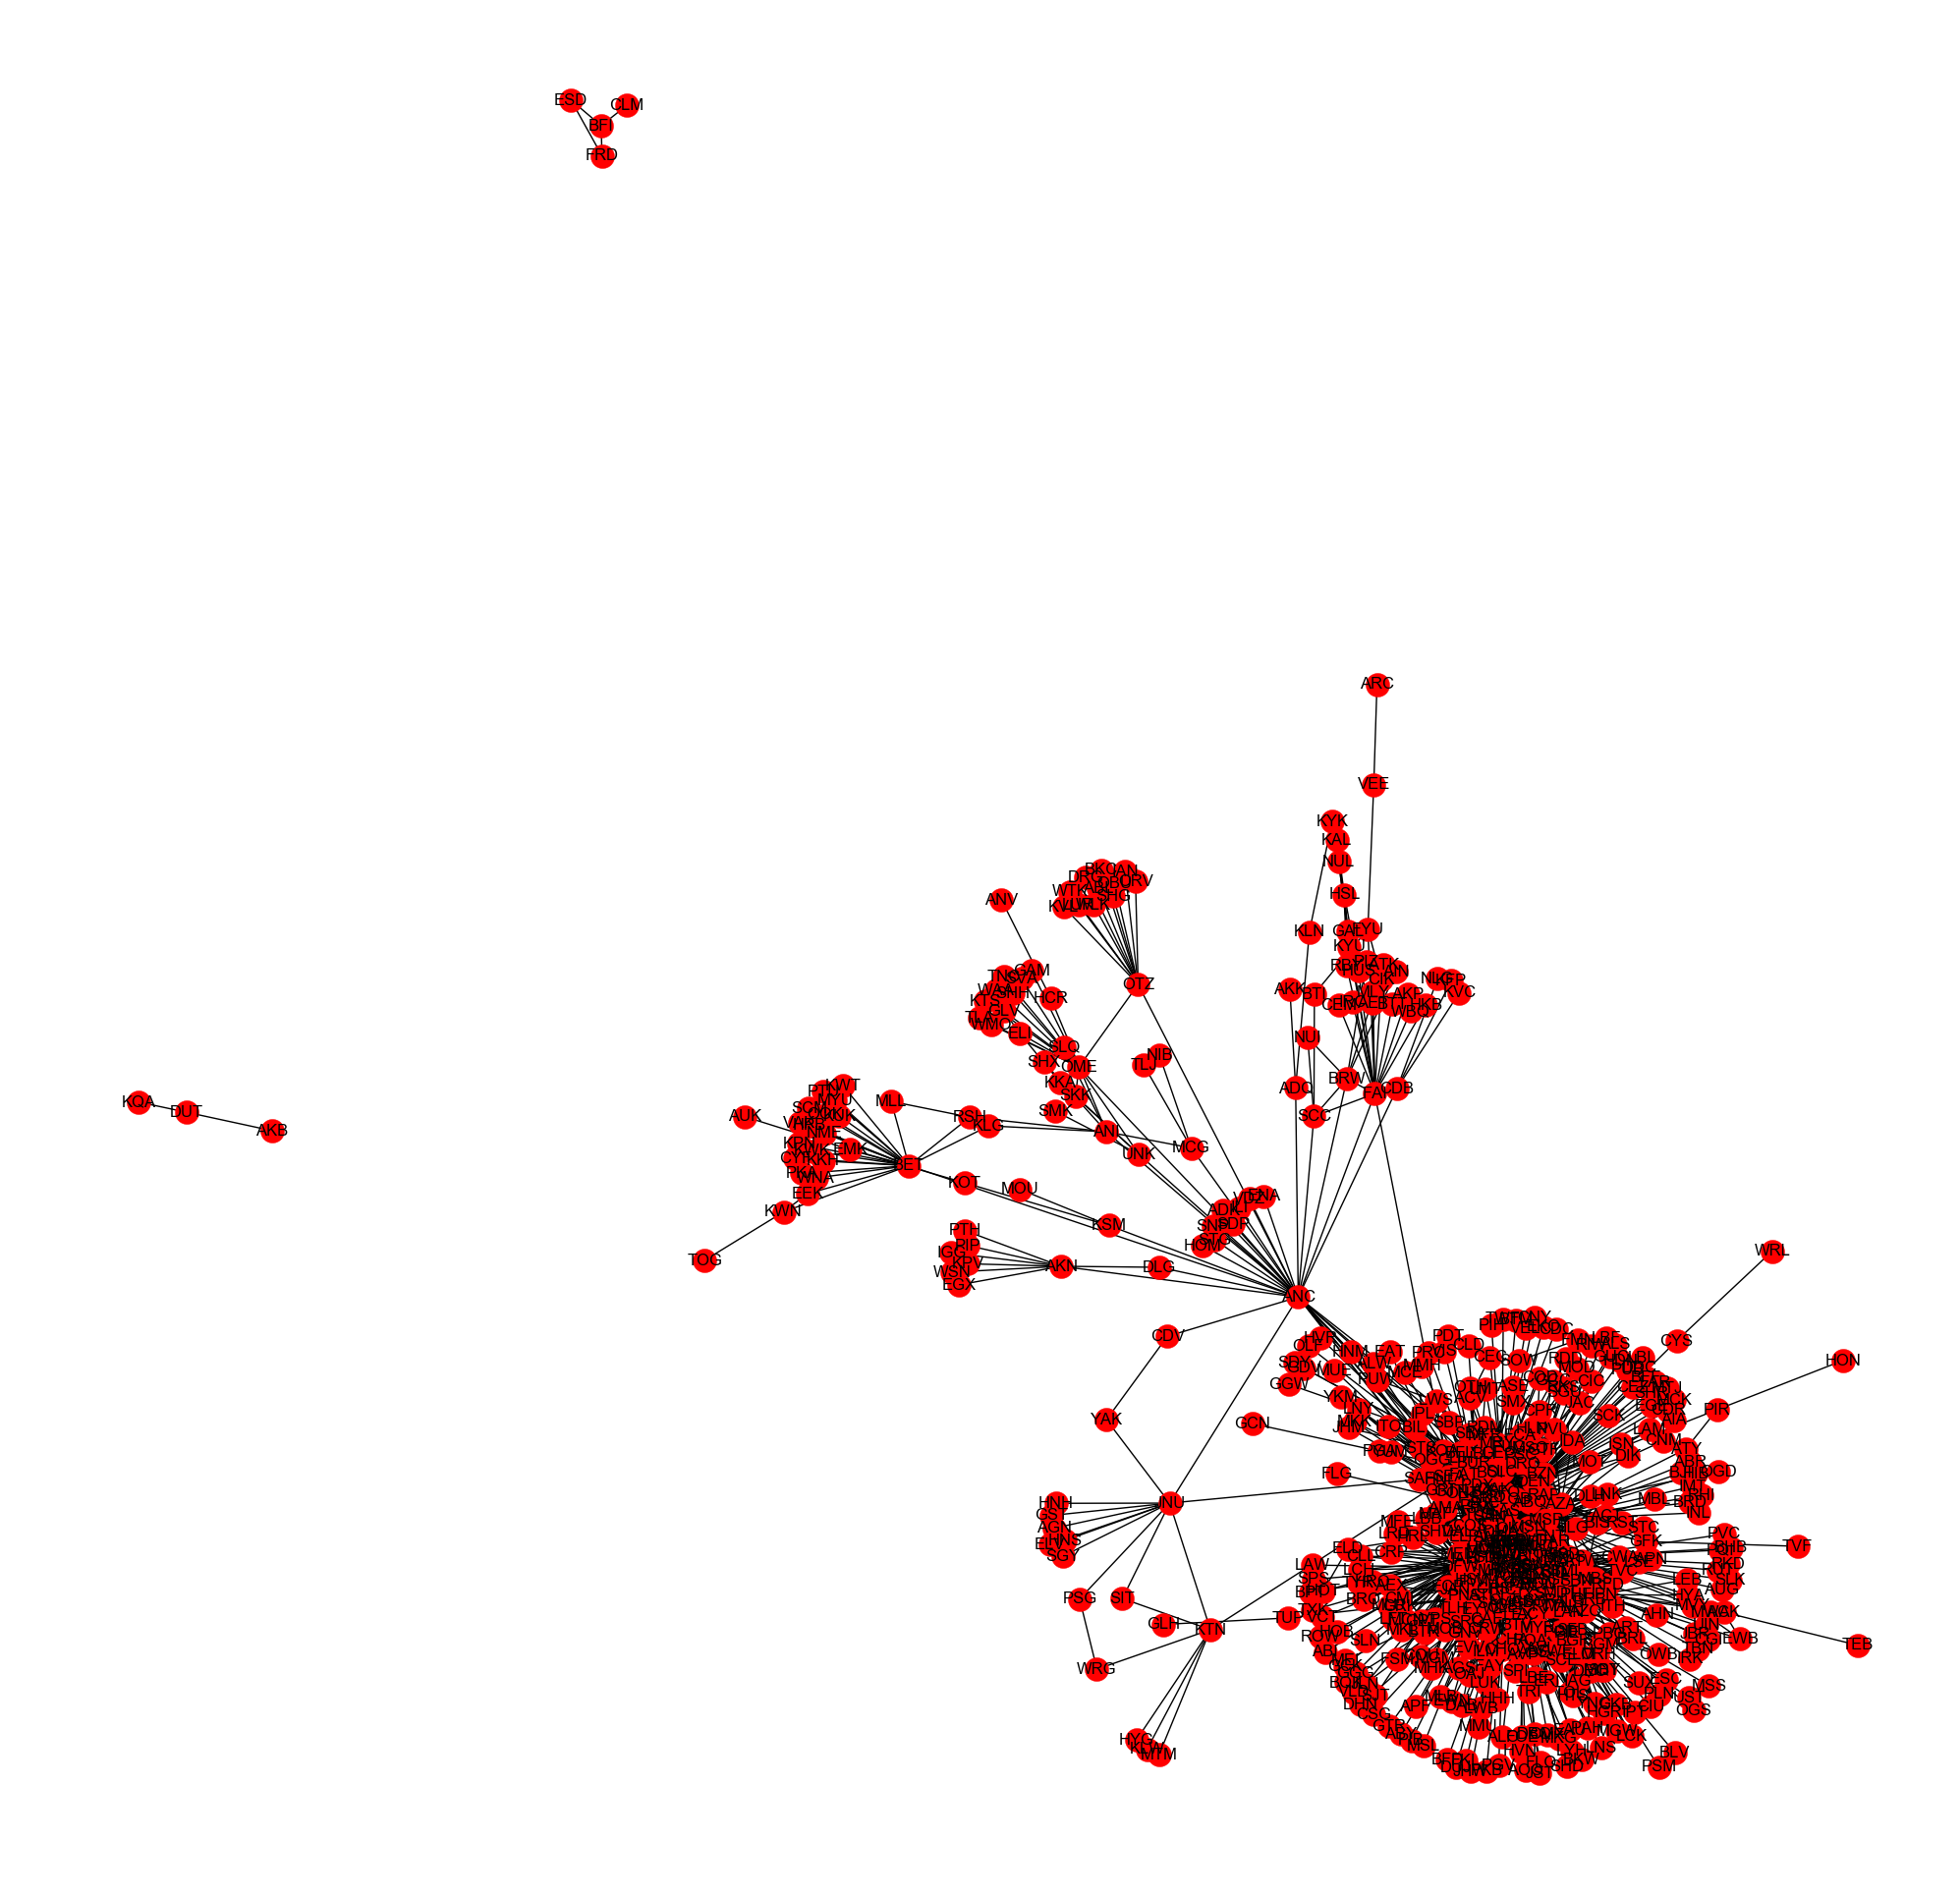

In [41]:
plt.figure(figsize=(25,25))
nx.draw_networkx(g)
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [42]:
sg = next(nx.connected_component_subgraphs(g))

/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


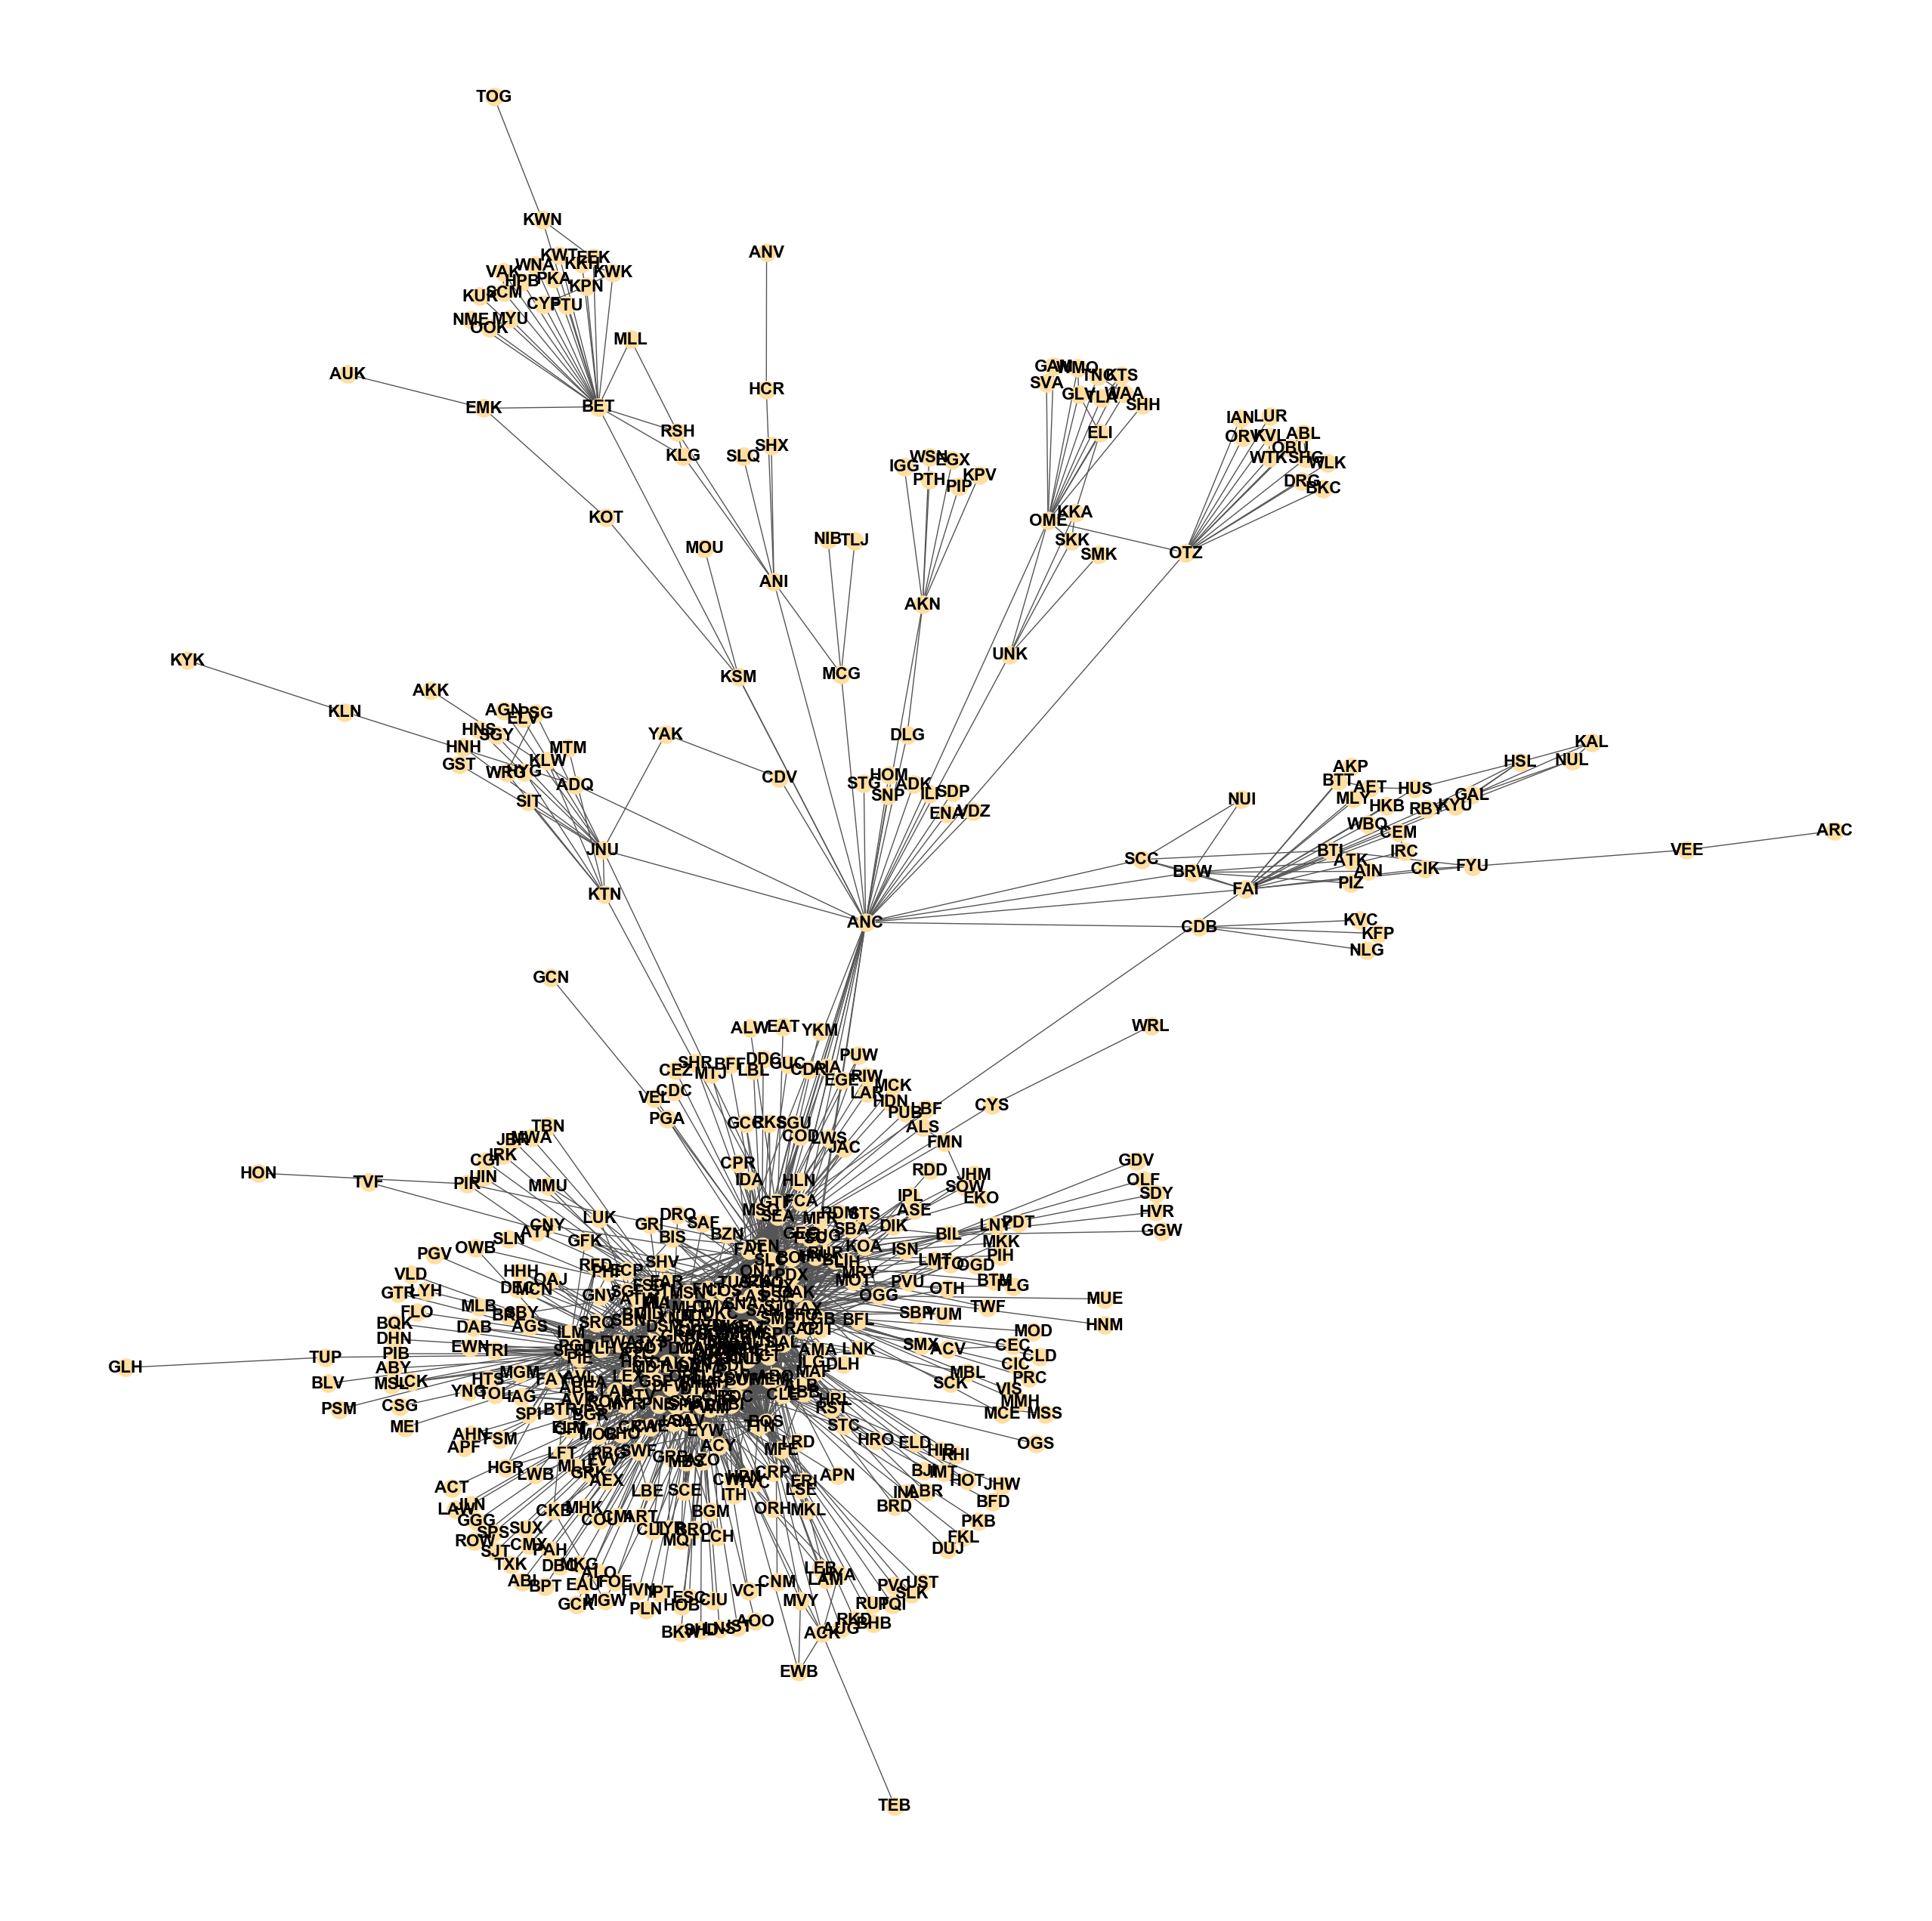

In [43]:
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#555555',
    'width': 1,
    'with_labels': True, 
    'node_color': '#FFDEA2',
    'font_weight': 'bold',
    'font_size':16
}
#nx.draw_networkx(g,   pos=nx.spring_layout(g, k=0.22, iterations=50), **options)
#nx.draw_spring(sg, **options)
nx.draw(sg, **options)
ax = plt.gca()
ax.set_axis_off()
plt.show()

Get the degree of the node for Boston Logan airport, and print out the average degree

In [44]:
deg = nx.degree(g)
print (deg['BOS'])

70


Get the clustering coefficient of Boston Logan airport

In [45]:
clus = nx.clustering(g)
print (clus['BOS'])

print(nx.average_clustering(g))

0.3908902691511387
0.4930453868822471


In [46]:
dict1 = nx.degree_centrality(g)

def print_centrality(dict):
    for i,w in enumerate(sorted(dict, key=dict.get, reverse=True)):
        if (i < 15):
            print (w, dict[w])
        else:
            break
            
print_centrality(dict1)      

ATL 0.28073394495412846
ORD 0.27339449541284405
DEN 0.27155963302752295
DFW 0.25321100917431194
MSP 0.21467889908256882
DTW 0.20917431192660552
LAS 0.20733944954128442
CLT 0.2018348623853211
IAH 0.1853211009174312
PHL 0.1614678899082569
LAX 0.1559633027522936
DCA 0.1559633027522936
SLC 0.1559633027522936
IAD 0.14862385321100918
PHX 0.14128440366972478


In [47]:
dict2 = nx.closeness_centrality(g)
print('\nCloseness centrality')
print_centrality(dict2)   

dict3 = nx.betweenness_centrality(g)
print('\nBetweenness centrality')
print_centrality(dict3)   

dict4 = nx.eigenvector_centrality(g)
print('\nEigenvector centrality')
print_centrality(dict4)   

dict5 = nx.pagerank(g)
print('\nPage rank')
print_centrality(dict5)   



Closeness centrality
DEN 0.5038803683651619
ORD 0.5019753386170895
LAS 0.4872384479420925
MSP 0.4872384479420925
SEA 0.47889080997013594
LAX 0.4716606645265371
PHX 0.46792062401487294
SLC 0.4670975446410561
ATL 0.4630252033625813
DFW 0.45548019576061816
PDX 0.4523764124845663
DTW 0.44554522504771876
CLT 0.4440551072381946
IAH 0.44037305825612005
ANC 0.4389172795511411

Betweenness centrality
ANC 0.31899060819839725
DEN 0.1508530331249355
ORD 0.1260940126959269
SEA 0.12208809426888918
ATL 0.08889776963308949
MSP 0.08318950532434445
DFW 0.08035666969264783
BET 0.07789058283864005
FAI 0.06866440263392941
LAS 0.06211784716407518
SLC 0.05664379636663333
LAX 0.052399152668987675
BOS 0.04477480483995576
CLT 0.04210245558136882
OME 0.039533864004317326

Eigenvector centrality
ATL 0.1962644027749424
ORD 0.1928070887788338
DFW 0.1819287671857016
DEN 0.18174295706272767
DTW 0.1745910270532595
MSP 0.17197000827680295
CLT 0.17145881881299083
LAS 0.17002732680200366
IAH 0.16151552893372062
PHL 0.15

In [48]:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Closeness centrality']= pd.DataFrame(nx.closeness_centrality(g),index=[0]).T
centralMeasures['Betweenness centrality']= pd.DataFrame(nx.betweenness_centrality(g),index=[0]).T
centralMeasures['Eigenvector centrality']= pd.DataFrame(nx.eigenvector_centrality(g),index=[0]).T
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))
centralMeasures.sort_values(by=['Degree Centrality'], ascending=False).head(15)

Degree Centrality  Closeness centrality  Betweenness centrality  \
10            0.280734              0.463025                0.088898   
4             0.273394              0.501975                0.126094   
225           0.271560              0.503880                0.150853   
181           0.253211              0.455480                0.080357   
136           0.214679              0.487238                0.083190   
141           0.209174              0.445545                0.034930   
28            0.207339              0.487238                0.062118   
178           0.201835              0.444055                0.042102   
236           0.185321              0.440373                0.030612   
179           0.161468              0.434963                0.022925   
187           0.155963              0.431430                0.012504   
262           0.155963              0.467098                0.056644   
29            0.155963              0.471661                0.052399   
235           0.148624              0.430381                0.035362   
183           0.141284              0.467921                0.033747   

     Eigenvector centrality  Page Rank Name  
10                 0.196264   0.021663  ATL  
4                  0.192807   0.021039  ORD  
225                0.181743   0.023969  DEN  
181                0.181929   0.020352  DFW  
136                0.171970   0.016695  MSP  
141                0.174591   0.014633  DTW  
28                 0.170027   0.014734  LAS  
178                0.171459   0.014411  CLT  
236                0.161516   0.013164  IAH  
179                0.156226   0.011037  PHL  
187                0.152884   0.010102  DCA  
262                0.129680   0.012906  SLC  
29                 0.146657   0.011981  LAX  
235                0.144058   0.010793  IAD  
183                0.145251   0.010059  PHX

<a id='shakespeare'></a>


--------

[back to top](#top)



Scraping - Shakespeare
=====


--------

Scraping with Beautiful Soup
-----

In [49]:
url = 'http://shakespeare.mit.edu/'
main_page=requests.get(url)
soup = BeautifulSoup(main_page.text, "html.parser")

In [50]:
#reading title of Shakespeare literary work
title_list = []
i = 0
#finding literature types
lit_types = soup.find_all("table")[1].find_all("tr")
lit_type_list = ['Comedy', 'History', 'Tragedy', 'Poetry']
base_url = 'http://shakespeare.mit.edu/'
for group in lit_types[1].find_all("td"):
    group_len = len(group.find_all("a"))
    group_name = lit_type_list[i]
    print(group_len, " plays in group ", group_name)
    for link in group.find_all("a"):
        temp_dict = {}
        temp_dict['literature_type'] = group_name
        temp_dict['title'] = link.contents[0].strip()
        temp_dict['url'] = base_url + link.attrs['href']
        title_list.append(temp_dict)
    i += 1

17  plays in group  Comedy
10  plays in group  History
10  plays in group  Tragedy
5  plays in group  Poetry


In [51]:
pd.DataFrame(title_list).head(10)

literature_type                        title  \
0          Comedy    All's Well That Ends Well   
1          Comedy               As You Like It   
2          Comedy         The Comedy of Errors   
3          Comedy                    Cymbeline   
4          Comedy          Love's Labours Lost   
5          Comedy          Measure for Measure   
6          Comedy  The\nMerry Wives of Windsor   
7          Comedy       The Merchant of Venice   
8          Comedy    A Midsummer Night's Dream   
9          Comedy       Much Ado About Nothing   

                                                 url  
0     http://shakespeare.mit.edu/allswell/index.html  
1  http://shakespeare.mit.edu/asyoulikeit/index.html  
2  http://shakespeare.mit.edu/comedy_errors/index...  
3    http://shakespeare.mit.edu/cymbeline/index.html  
4          http://shakespeare.mit.edu/lll/index.html  
5      http://shakespeare.mit.edu/measure/index.html  
6  http://shakespeare.mit.edu/merry_wives/index.html  
7     http://shakespeare.mit.edu/merchant/index.html  
8    http://shakespeare.mit.edu/midsummer/index.html  
9     http://shakespeare.mit.edu/much_ado/index.html

In [52]:
play_scene_list = []

#The First part of A Midsummer Night's Dream

base_url = 'http://shakespeare.mit.edu/midsummer/index.html'
main_page=requests.get(base_url)
soup = BeautifulSoup(main_page.text, 'html.parser')

#reading content of scenes in play
for link in soup.find_all("a")[3:]:
    link_s = link.attrs['href']
    if (link_s.count('.') == 3):
        play_scene_dict = {}
        play_scene_dict['title'] = 'A Midsummer Night\'s Dream'
        play_scene_dict['scene_title'] = link.contents[0].strip()
        play_scene_dict['scene_url'] = 'http://shakespeare.mit.edu/midsummer' + '/' + link.attrs['href']
        play_scene_dict['act'] = link_s.split('.')[-3]
        play_scene_dict['scene'] = link_s.split('.')[-2]
        play_scene_list.append(play_scene_dict)
    else:
        #print(link_s)
        pass
    
play_scene_list[0:4]

[{'title': "A Midsummer Night's Dream",
  'scene_title': 'Athens. The palace of THESEUS.',
  'scene_url': 'http://shakespeare.mit.edu/midsummer/midsummer.1.1.html',
  'act': '1',
  'scene': '1'},
 {'title': "A Midsummer Night's Dream",
  'scene_title': "Athens. QUINCE'S house.",
  'scene_url': 'http://shakespeare.mit.edu/midsummer/midsummer.1.2.html',
  'act': '1',
  'scene': '2'},
 {'title': "A Midsummer Night's Dream",
  'scene_title': 'A wood near Athens.',
  'scene_url': 'http://shakespeare.mit.edu/midsummer/midsummer.2.1.html',
  'act': '2',
  'scene': '1'},
 {'title': "A Midsummer Night's Dream",
  'scene_title': 'Another part of the wood.',
  'scene_url': 'http://shakespeare.mit.edu/midsummer/midsummer.2.2.html',
  'act': '2',
  'scene': '2'}]

In [53]:
url = 'http://shakespeare.mit.edu/midsummer/full.html'
main_page=requests.get(url)
soup = BeautifulSoup(main_page.text, "html.parser")

play = collections.OrderedDict()
speech = 0

for link in soup.find_all('a')[2:]:
    if link.attrs['name'].find('speech') != -1:
        speech += 1
        character = str(link.contents[0]).strip('<b>').strip('</b>')
    if link.attrs['name'].find('speech') == -1:
        play[link.attrs['name']] = {}
        play[link.attrs['name']]['act'] = link.attrs['name'].split('.')[0]
        play[link.attrs['name']]['scene'] = link.attrs['name'].split('.')[1]
        play[link.attrs['name']]['line'] = link.attrs['name'].split('.')[2]       
        play[link.attrs['name']]['speech'] = speech
        if 'character' in locals():
            play[link.attrs['name']]['character'] = character
        play[link.attrs['name']]['text'] = link.contents[0]

In [54]:
midsummer = pd.DataFrame.from_dict(play, orient='index')
midsummer.head(20)

act scene line  speech  character  \
1.1.1     1     1    1       1    THESEUS   
1.1.10    1     1   10       2  HIPPOLYTA   
1.1.100   1     1  100      18      EGEUS   
1.1.101   1     1  101      19   LYSANDER   
1.1.102   1     1  102      19   LYSANDER   
1.1.103   1     1  103      19   LYSANDER   
1.1.104   1     1  104      19   LYSANDER   
1.1.105   1     1  105      19   LYSANDER   
1.1.106   1     1  106      19   LYSANDER   
1.1.107   1     1  107      19   LYSANDER   
1.1.108   1     1  108      19   LYSANDER   
1.1.109   1     1  109      19   LYSANDER   
1.1.11    1     1   11       2  HIPPOLYTA   
1.1.110   1     1  110      19   LYSANDER   
1.1.111   1     1  111      19   LYSANDER   
1.1.112   1     1  112      19   LYSANDER   
1.1.113   1     1  113      20    THESEUS   
1.1.114   1     1  114      20    THESEUS   
1.1.115   1     1  115      20    THESEUS   
1.1.116   1     1  116      20    THESEUS   

                                                      text  
1.1.1                Now, fair Hippolyta, our nuptial hour  
1.1.10          New-bent in heaven, shall behold the night  
1.1.100                        I do estate unto Demetrius.  
1.1.101              I am, my lord, as well derived as he,  
1.1.102       As well possess'd; my love is more than his;  
1.1.103            My fortunes every way as fairly rank'd,  
1.1.104                If not with vantage, as Demetrius';  
1.1.105   And, which is more than all these boasts can be,  
1.1.106                  I am beloved of beauteous Hermia:  
1.1.107          Why should not I then prosecute my right?  
1.1.108             Demetrius, I'll avouch it to his head,  
1.1.109             Made love to Nedar's daughter, Helena,  
1.1.11                                 Of our solemnities.  
1.1.110      And won her soul; and she, sweet lady, dotes,  
1.1.111                 Devoutly dotes, dotes in idolatry,  
1.1.112              Upon this spotted and inconstant man.  
1.1.113          I must confess that I have heard so much,  
1.1.114  And with Demetrius thought to have spoke thereof;  
1.1.115              But, being over-full of self-affairs,  
1.1.116         My mind did lose it. But, Demetrius, come;

In [55]:
midsummer['act_scene'] = midsummer['act'] + "_" +  midsummer['scene']
midsummer['character'] = midsummer['character'].astype(str).str.lower()
midsummer.dropna(inplace=True)
midsummer.head(10)

act scene line  speech  character  \
1.1.1     1     1    1       1    theseus   
1.1.10    1     1   10       2  hippolyta   
1.1.100   1     1  100      18      egeus   
1.1.101   1     1  101      19   lysander   
1.1.102   1     1  102      19   lysander   
1.1.103   1     1  103      19   lysander   
1.1.104   1     1  104      19   lysander   
1.1.105   1     1  105      19   lysander   
1.1.106   1     1  106      19   lysander   
1.1.107   1     1  107      19   lysander   

                                                     text act_scene  
1.1.1               Now, fair Hippolyta, our nuptial hour       1_1  
1.1.10         New-bent in heaven, shall behold the night       1_1  
1.1.100                       I do estate unto Demetrius.       1_1  
1.1.101             I am, my lord, as well derived as he,       1_1  
1.1.102      As well possess'd; my love is more than his;       1_1  
1.1.103           My fortunes every way as fairly rank'd,       1_1  
1.1.104               If not with vantage, as Demetrius';       1_1  
1.1.105  And, which is more than all these boasts can be,       1_1  
1.1.106                 I am beloved of beauteous Hermia:       1_1  
1.1.107         Why should not I then prosecute my right?       1_1

In [56]:
pd.set_option('display.max_colwidth' ,50) #default
#Target variable distribution
midsummer.character.value_counts()
print(midsummer.character.value_counts()/midsummer.shape[0])

theseus         0.107870
helena          0.106019
oberon          0.104630
puck            0.097222
bottom          0.094444
lysander        0.082407
hermia          0.076389
titania         0.073148
demetrius       0.062037
quince          0.038426
pyramus         0.025926
egeus           0.018981
prologue        0.016204
thisbe          0.015741
hippolyta       0.015741
fairy           0.013889
philostrate     0.011111
flute           0.010648
wall            0.005556
lion            0.004167
snout           0.003241
moonshine       0.002778
snug            0.002778
mustardseed     0.002315
starveling      0.002315
cobweb          0.001852
peaseblossom    0.001852
moth            0.000926
all             0.000926
hernia          0.000463
Name: character, dtype: float64


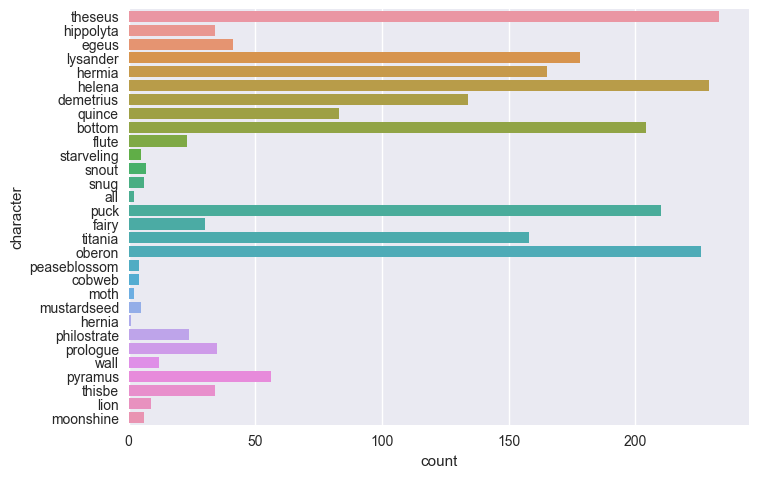

In [57]:
sns.countplot(y='character', data=midsummer);

--------

Network Analysis
-----


In [58]:
g = nx.from_pandas_edgelist(midsummer,source='act_scene',target='character')

/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


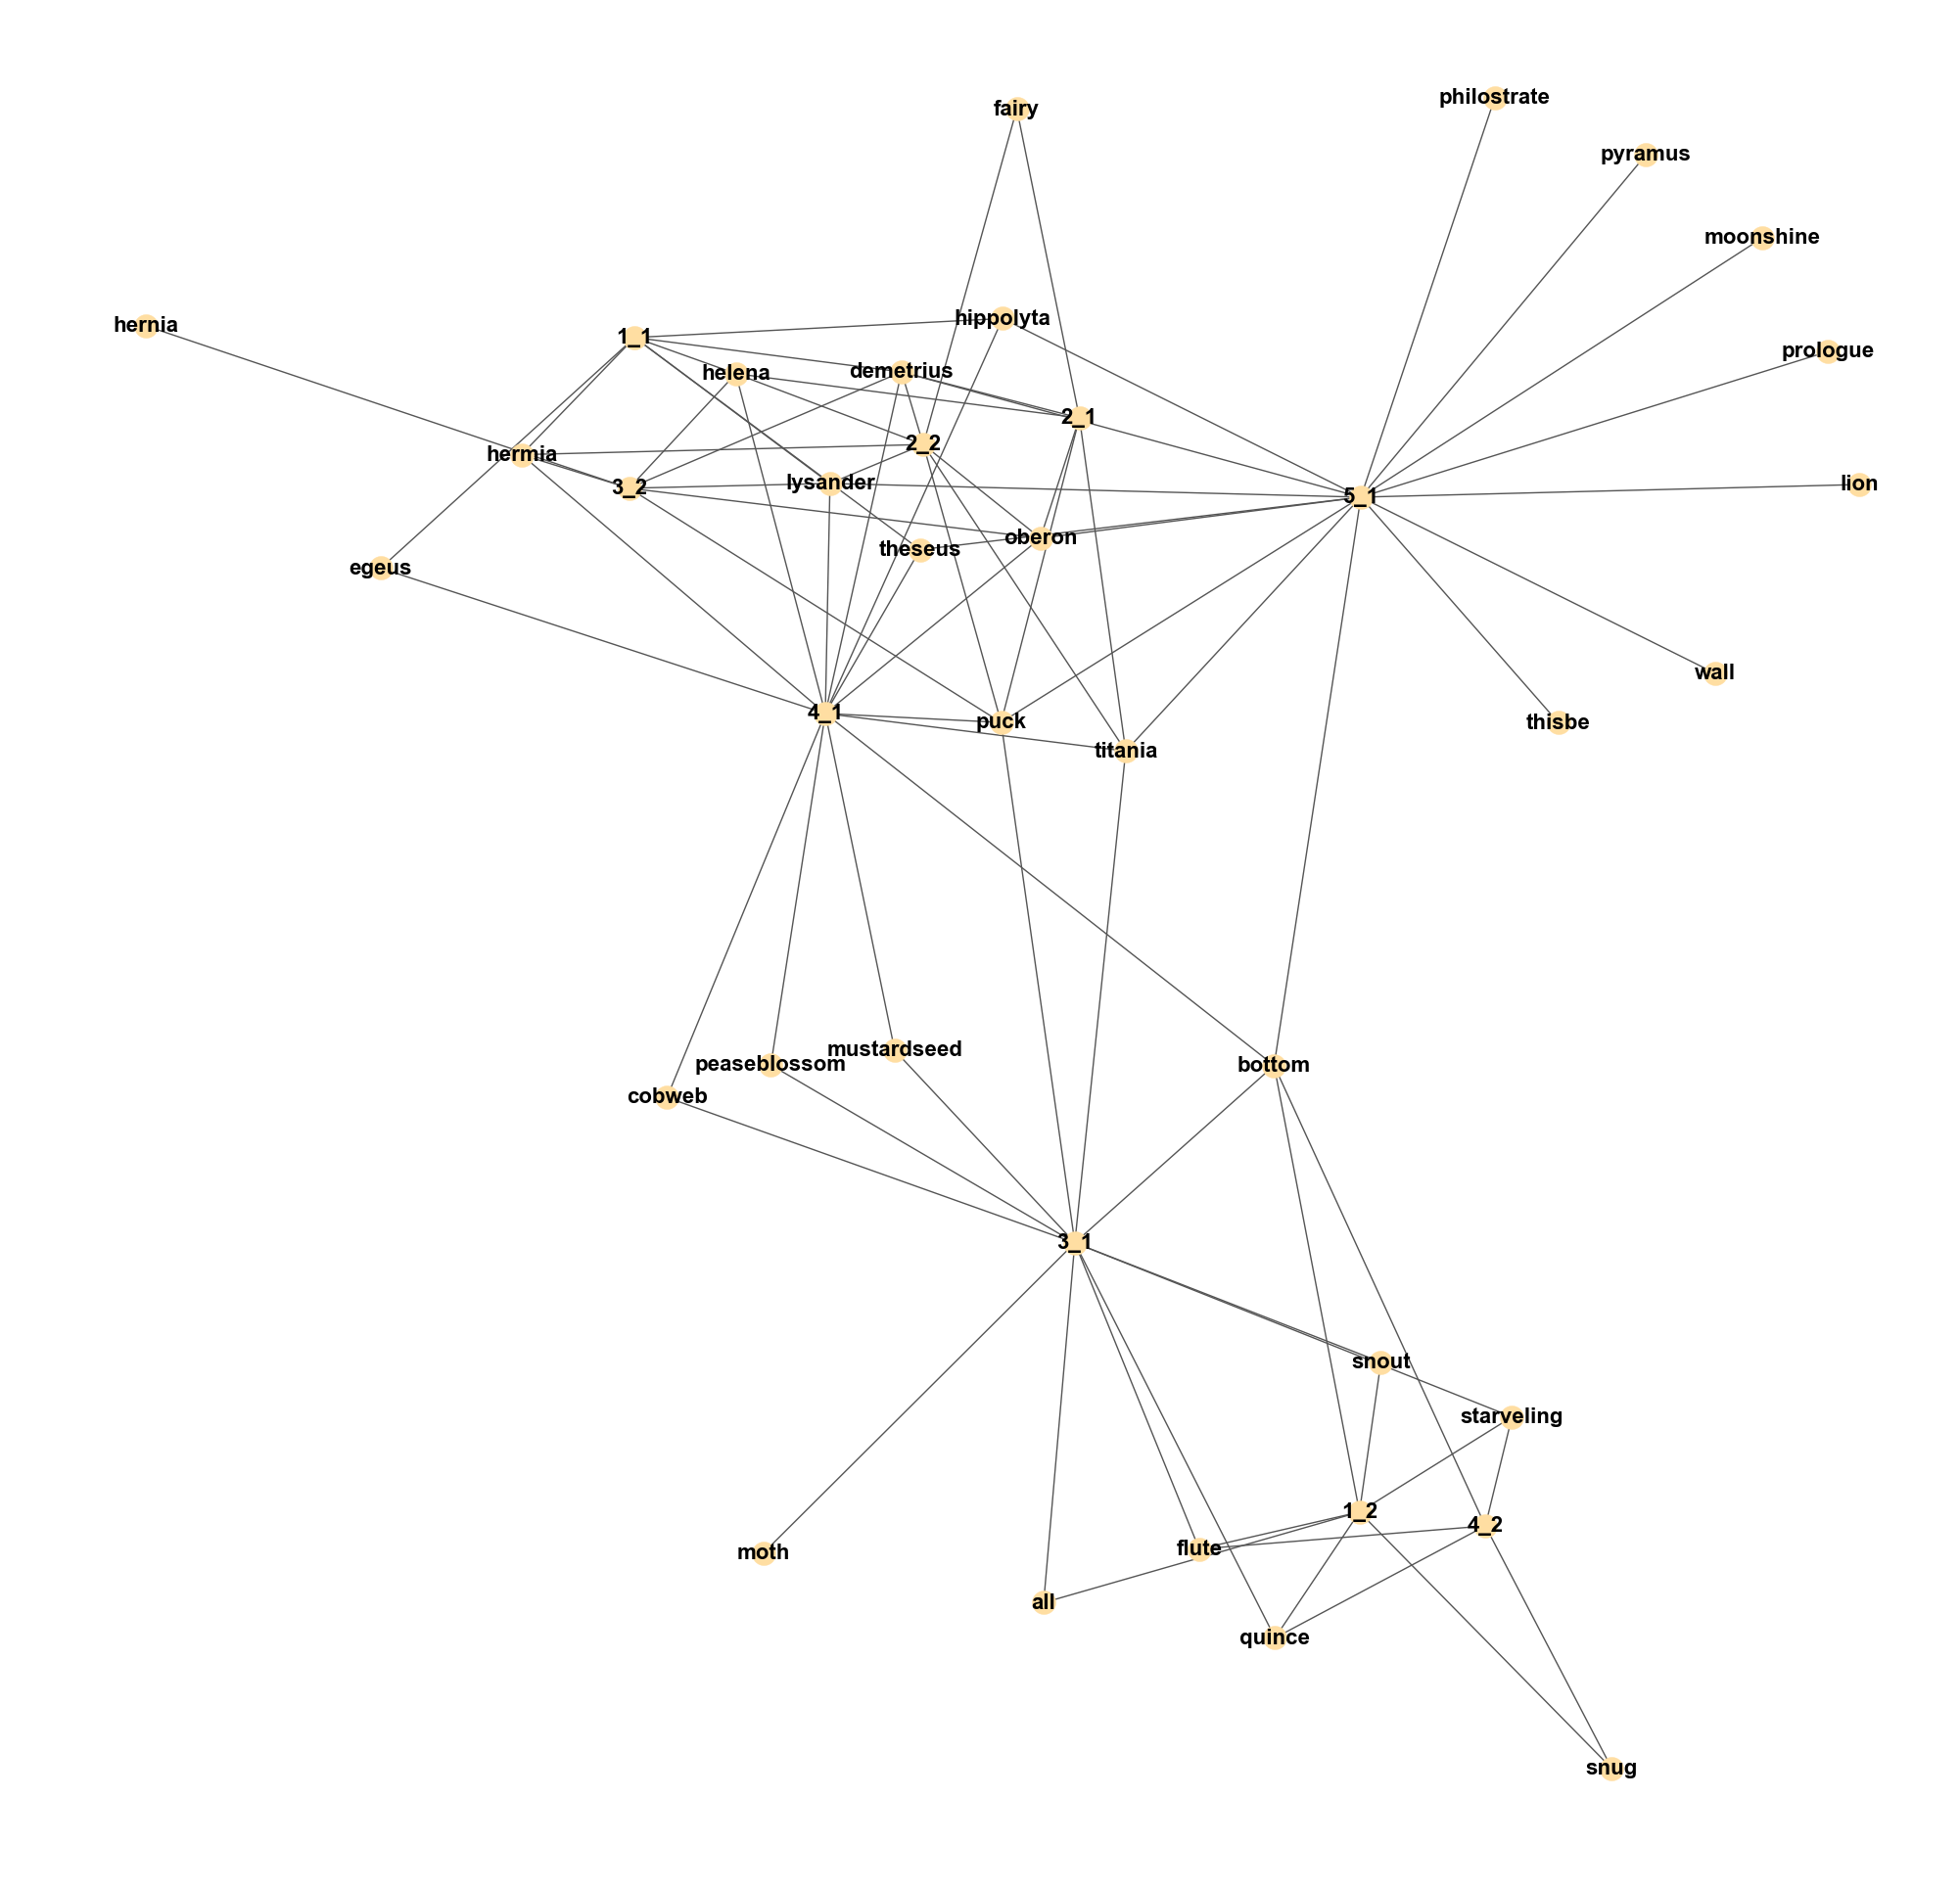

In [59]:
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#555555',
    'width': 1,
    'with_labels': True, 
    'node_color': '#FFDEA2',
    'font_weight': 'bold',
    'font_size':16
}
nx.draw_networkx(g,   pos=nx.spring_layout(g, k=0.20, iterations=50), **options)
#nx.draw_spring(g, **options)
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [60]:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Closeness centrality']= pd.DataFrame(nx.closeness_centrality(g),index=[0]).T
centralMeasures['Betweenness centrality']= pd.DataFrame(nx.betweenness_centrality(g),index=[0]).T
centralMeasures['Eigenvector centrality']= pd.DataFrame(nx.eigenvector_centrality(g),index=[0]).T
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))
centralMeasures.sort_values(by=['Degree Centrality'], ascending=False).head(15)

Degree Centrality  Closeness centrality  Betweenness centrality  \
31           0.394737              0.500000                0.397945   
29           0.368421              0.487179                0.249250   
22           0.315789              0.452381                0.279253   
21           0.210526              0.395833                0.053173   
0            0.184211              0.339286                0.025581   
27           0.184211              0.387755                0.067228   
8            0.184211              0.365385                0.060480   
16           0.157895              0.380000                0.032708   
7            0.157895              0.436782                0.049691   
17           0.157895              0.506667                0.127694   
30           0.131579              0.351852                0.037796   
20           0.131579              0.426966                0.035843   
19           0.131579              0.481013                0.085509   
10           0.131579              0.481013                0.178215   
6            0.131579              0.368932                0.018348   

    Eigenvector centrality  Page Rank       Name  
31                0.324563   0.099964        5_1  
29                0.387128   0.075669        4_1  
22                0.191654   0.072427        3_1  
21                0.264595   0.042530        2_2  
0                 0.202040   0.038945        1_1  
27                0.222738   0.039504        3_2  
8                 0.067787   0.044182        1_2  
16                0.200190   0.032966        2_1  
7                 0.258170   0.032819  demetrius  
17                0.256496   0.033220       puck  
30                0.054298   0.031992        4_2  
20                0.225595   0.028090     oberon  
19                0.220584   0.028423    titania  
10                0.165331   0.030038     bottom  
6                 0.205841   0.027154     helena

In [61]:
f = lambda x : pd.DataFrame(list(combinations(x.values,2)), columns=['characterA','characterB'])

pairs = (midsummer.groupby('act_scene')['character'].apply(f).reset_index(level=1, drop=True).reset_index())

In [62]:
pairs.head(5)

act_scene characterA characterB
0       1_1    theseus  hippolyta
1       1_1    theseus      egeus
2       1_1    theseus   lysander
3       1_1    theseus   lysander
4       1_1    theseus   lysander

### Let's make a new network on the basis of the pairs

In [63]:
g = nx.from_pandas_edgelist(pairs,source='characterA',target='characterB')

/Users/dave/Applications/anaconda/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


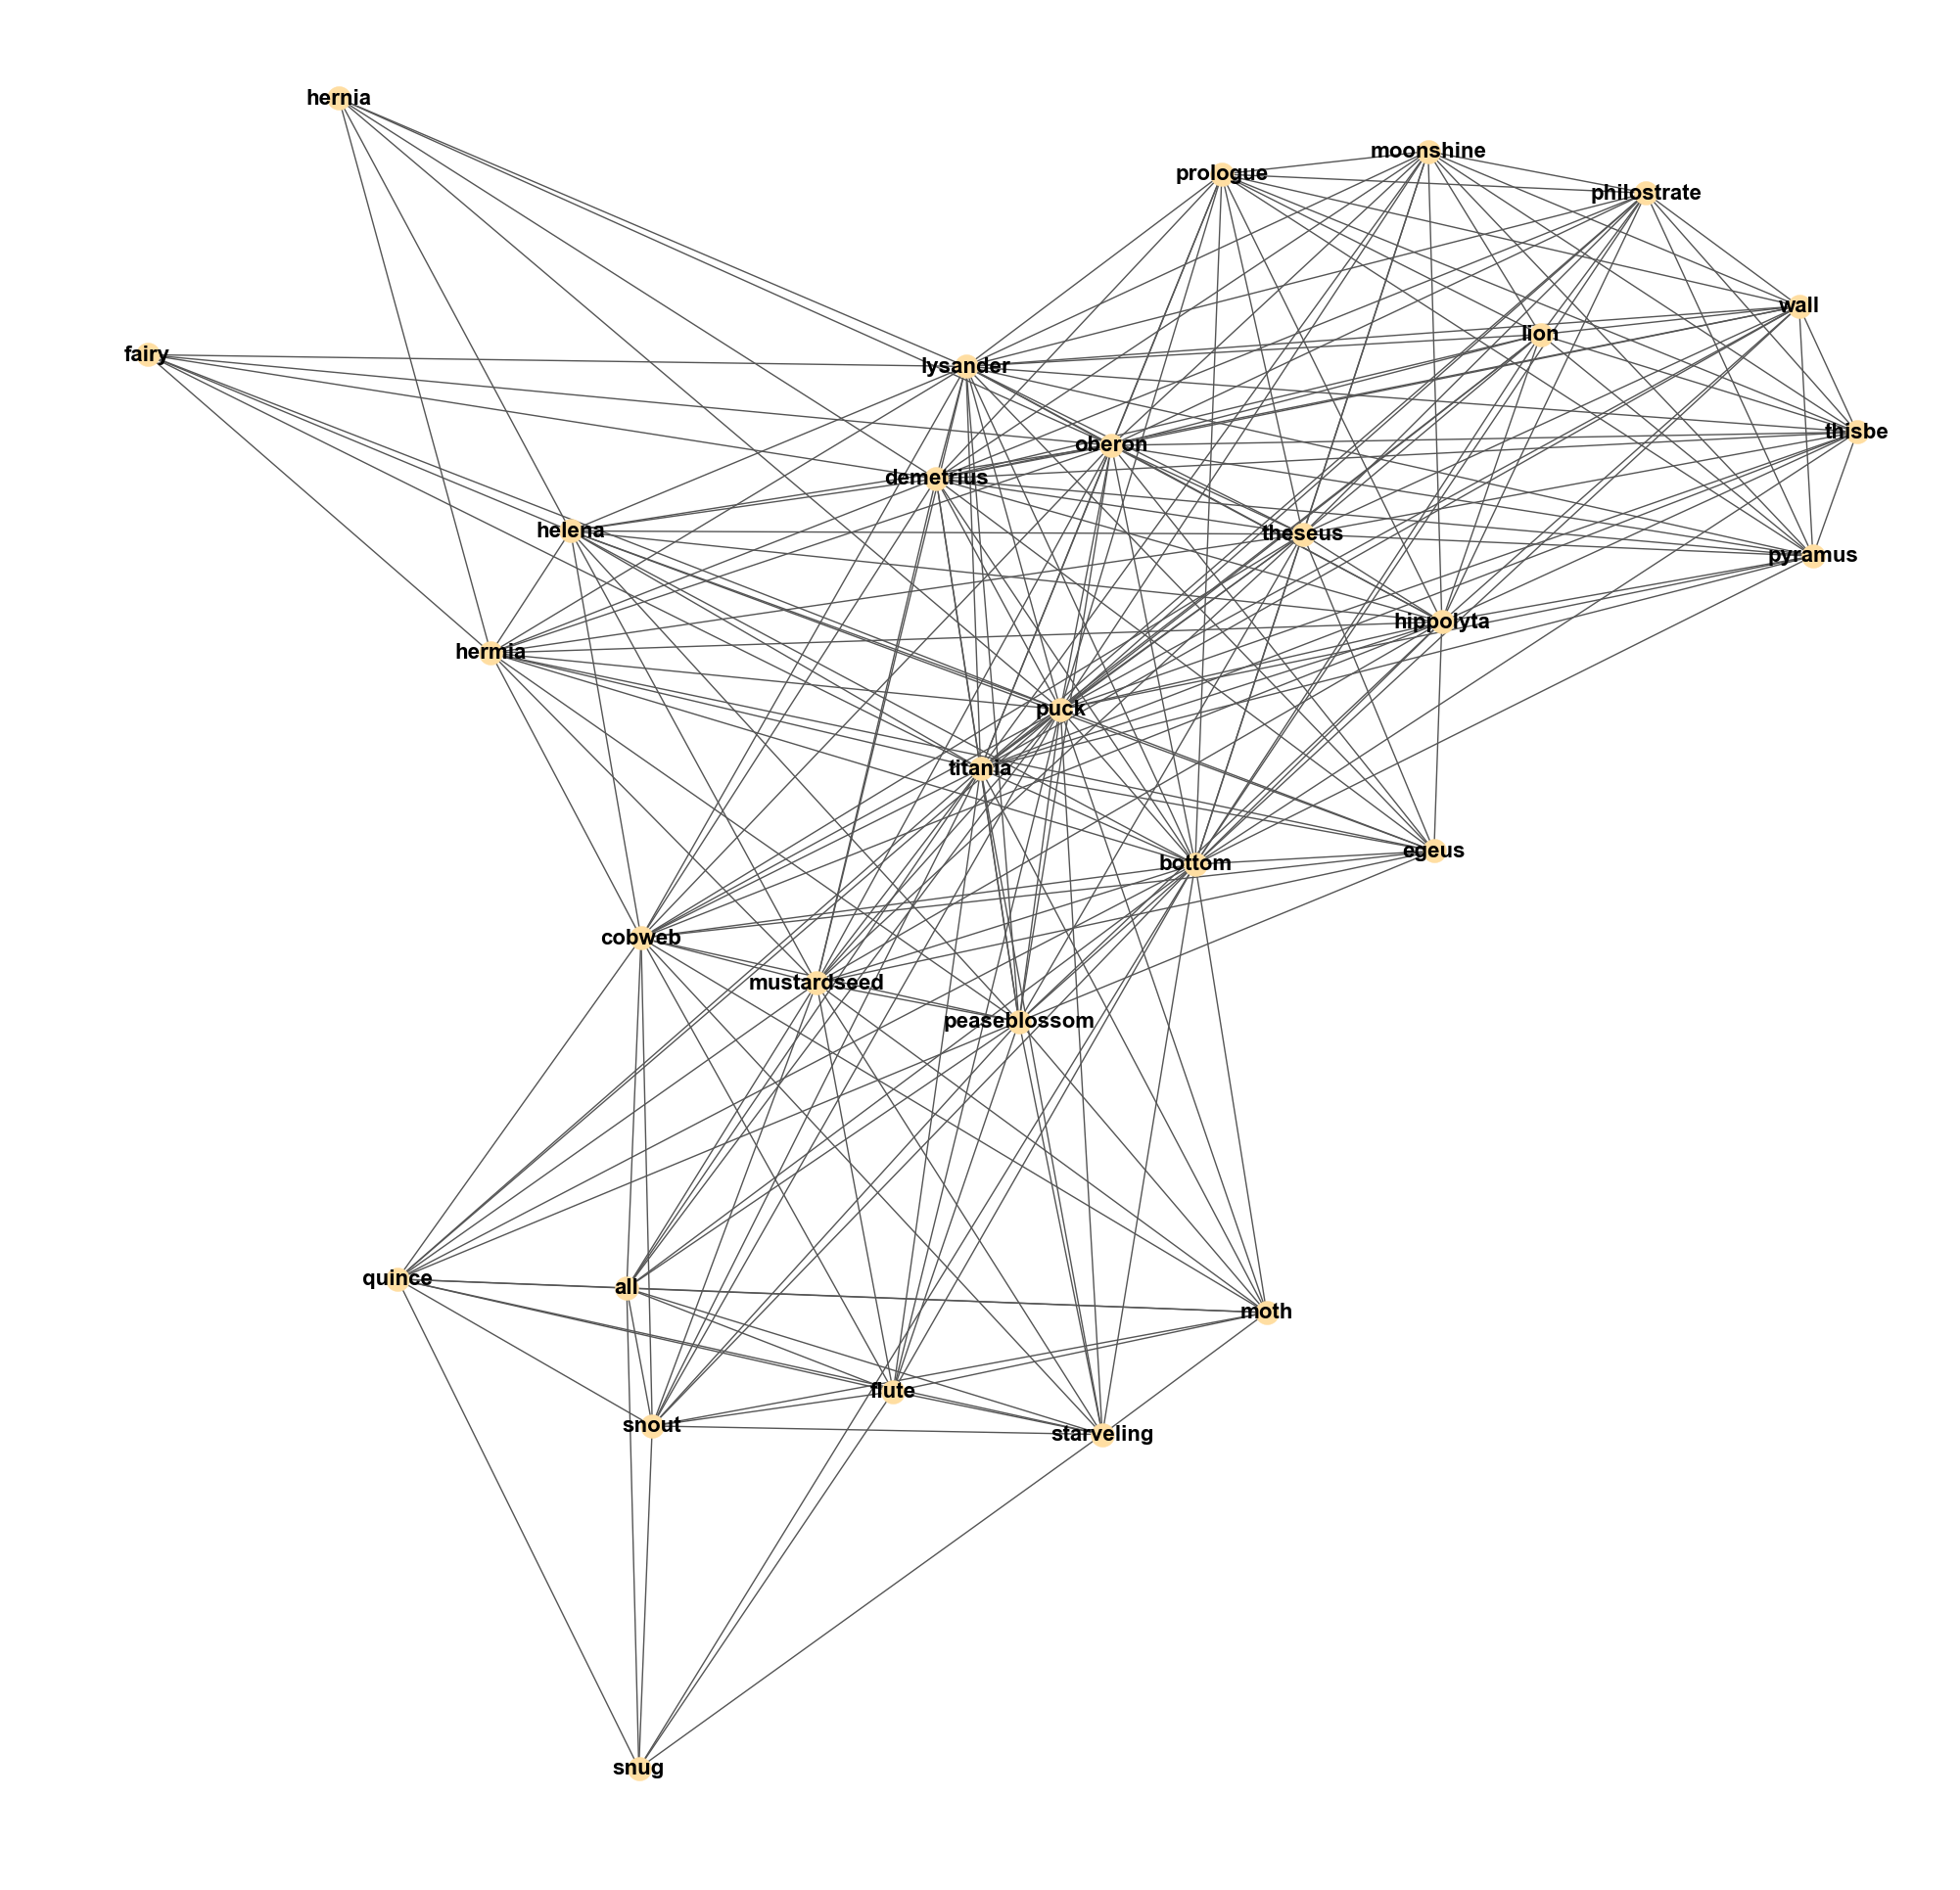

In [64]:
plt.figure(figsize=(25,25))
options = {
    'edge_color': '#555555',
    'width': 1,
    'with_labels': True, 
    'node_color': '#FFDEA2',
    'font_weight': 'bold',
    'font_size':16
}
nx.draw_networkx(g,   pos=nx.spring_layout(g, k=0.5, iterations=50), **options)
#nx.draw(g, **options)
#nx.draw_spring(g, **options)
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [65]:
centralMeasures = pd.DataFrame(nx.degree_centrality(g),index=[0]).T
centralMeasures.columns=['Degree Centrality']
centralMeasures['Closeness centrality']= pd.DataFrame(nx.closeness_centrality(g),index=[0]).T
centralMeasures['Betweenness centrality']= pd.DataFrame(nx.betweenness_centrality(g),index=[0]).T
centralMeasures['Eigenvector centrality']= pd.DataFrame(nx.eigenvector_centrality(g),index=[0]).T
centralMeasures['Page Rank']= pd.DataFrame(nx.pagerank(g),index=[0]).T
centralMeasures['Name']= centralMeasures.index.tolist()
centralMeasures.index = np.arange(0,len(centralMeasures))
centralMeasures.sort_values(by=['Degree Centrality'], ascending=False).head(15)

Degree Centrality  Closeness centrality  Betweenness centrality  \
14           1.034483              0.966667                0.105415   
16           1.000000              0.935484                0.081288   
8            1.000000              0.935484                0.108885   
17           0.827586              0.805556                0.027216   
3            0.827586              0.805556                0.027216   
6            0.827586              0.805556                0.027216   
0            0.758621              0.763158                0.012931   
1            0.758621              0.763158                0.012931   
21           0.724138              0.743590                0.019704   
18           0.724138              0.743590                0.019704   
19           0.724138              0.743590                0.019704   
5            0.586207              0.674419                0.006526   
4            0.586207              0.674419                0.006526   
25           0.551724              0.659091                0.000000   
24           0.551724              0.659091                0.000000   

    Eigenvector centrality  Page Rank          Name  
14                0.274271   0.054635          puck  
16                0.270456   0.052533       titania  
8                 0.268128   0.052755        bottom  
17                0.237974   0.043676        oberon  
3                 0.237974   0.043676      lysander  
6                 0.237974   0.043676     demetrius  
0                 0.229312   0.039620       theseus  
1                 0.229312   0.039620     hippolyta  
21                0.202281   0.038847   mustardseed  
18                0.202281   0.038847  peaseblossom  
19                0.202281   0.038847        cobweb  
5                 0.174646   0.031943        helena  
4                 0.174646   0.031943        hermia  
25                0.169375   0.029580          wall  
24                0.169375   0.029580      prologue